In [4]:
import pandas as pd
import random
from time import sleep
import warnings
import numpy as np
import nltk
import os
from sklearn import datasets
import pickle
from nltk.tokenize import word_tokenize
from sklearn.decomposition import NMF, TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.neighbors import NearestNeighbors
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc, fbeta_score
from sklearn.model_selection import learning_curve, KFold, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, MeanShift


import matplotlib.style as style
%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings('ignore')

In [5]:
with open('data/df_all_rappers.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)
    
with open('models/lda_cv_all_rappers.pkl', 'rb') as picklefile:
    lda_cv = pickle.load(picklefile)
    
with open('data/lda_cv_data_all_rappers.pkl', 'rb') as picklefile:
    lda_cv_data = pickle.load(picklefile)

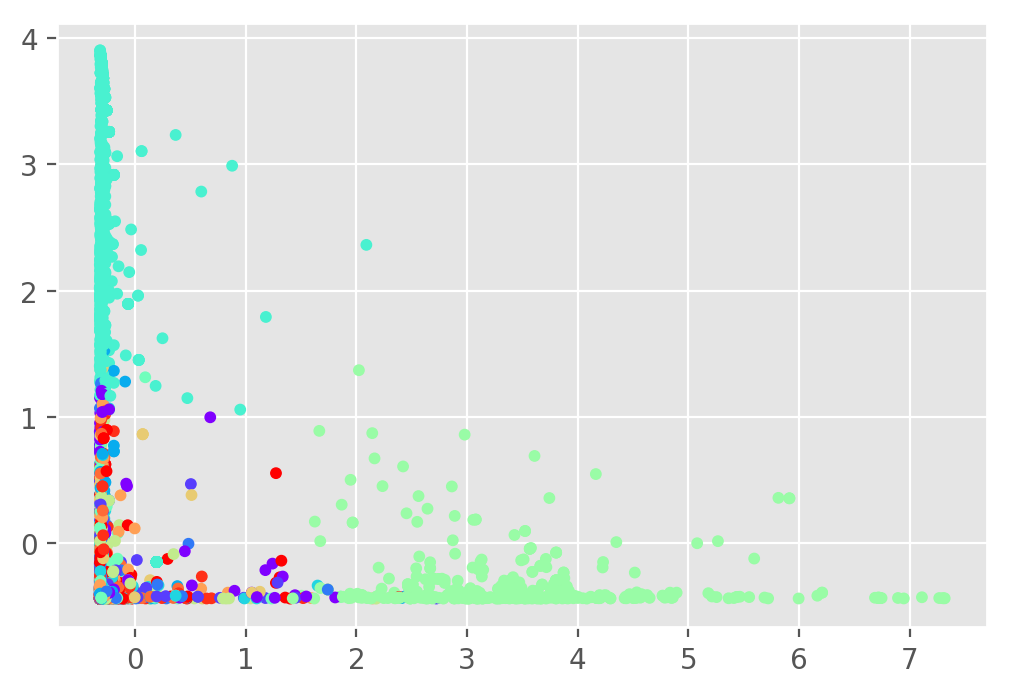

In [6]:
lda_cv_data = StandardScaler().fit_transform(lda_cv_data)

km = KMeans(n_clusters=15)
ypred = km.fit_predict(lda_cv_data)
#x,y = zip(*lda_cv_data)
plt.figure(dpi=200)
plt.scatter(lda_cv_data[:,0],lda_cv_data[:,1],c=plt.cm.rainbow(ypred*20),s=14);

In [7]:
list(range(15))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [8]:
print(km.labels_)
print(km.cluster_centers_)

[3 6 6 ... 6 2 6]
[[-0.23669017 -0.30347651 -0.19950836 -0.2209024  -0.20335407 -0.19544561
  -0.1876999  -0.1793788   1.8138248  -0.19775694 -0.21703285 -0.23576724
  -0.19324523 -0.22121199 -0.19360861]
 [-0.25076748 -0.35807551 -0.25886028  3.42871287 -0.24340278 -0.24246038
  -0.23302069 -0.21619726 -0.15032657 -0.24754054 -0.21171646 -0.28185104
  -0.24017933 -0.24753055 -0.22956743]
 [-0.26593054 -0.35068963 -0.25412849 -0.27654473 -0.2194252  -0.25100584
  -0.24330171 -0.25449412  0.10045487 -0.25909189  4.06393096 -0.27399447
  -0.24375444 -0.22520627 -0.27200025]
 [-0.2639142  -0.2940669  -0.26305619 -0.27993595 -0.24920522 -0.26023493
  -0.21804935 -0.25930677 -0.14010339 -0.24428558 -0.25586747  3.30159315
  -0.22857066 -0.26109468 -0.24853973]
 [-0.26455287 -0.33014553 -0.26288973 -0.25898044 -0.23893851 -0.26161891
   4.05923284 -0.23896986  0.04883981 -0.25045122 -0.23737815 -0.2851508
  -0.23859676 -0.23456435 -0.26014854]
 [-0.20343119  2.27561001 -0.20650751 -0.2030011

In [9]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, verbose=1, perplexity=50, random_state=69).fit_transform(lda_cv_data)
X_embedded.shape

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6304 samples in 0.007s...
[t-SNE] Computed neighbors for 6304 samples in 1.404s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6304
[t-SNE] Computed conditional probabilities for sample 2000 / 6304
[t-SNE] Computed conditional probabilities for sample 3000 / 6304
[t-SNE] Computed conditional probabilities for sample 4000 / 6304
[t-SNE] Computed conditional probabilities for sample 5000 / 6304
[t-SNE] Computed conditional probabilities for sample 6000 / 6304
[t-SNE] Computed conditional probabilities for sample 6304 / 6304
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.491329
[t-SNE] Error after 1000 iterations: 0.441874


(6304, 2)

In [10]:
lda_cv_data[:, 0].shape

(6304,)

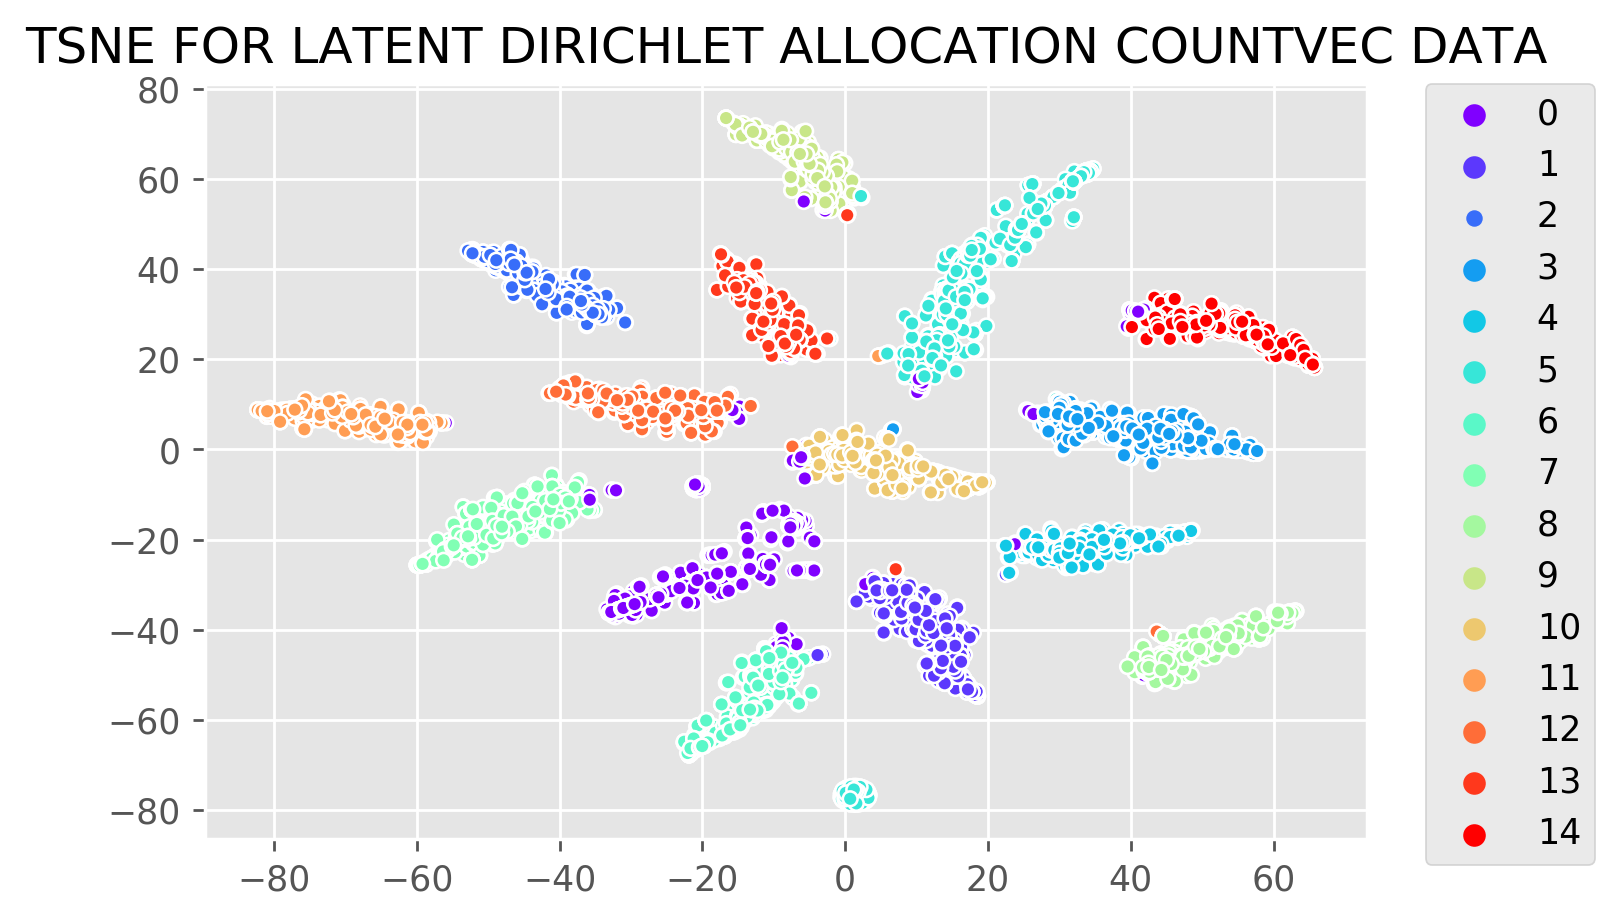

In [11]:
plt.figure(dpi=250)
plt.title("TSNE FOR LATENT DIRICHLET ALLOCATION COUNTVEC DATA")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], ypred,
               size = 2, palette = 'rainbow', alpha = 'auto',
              markers = '.', legend="full");

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

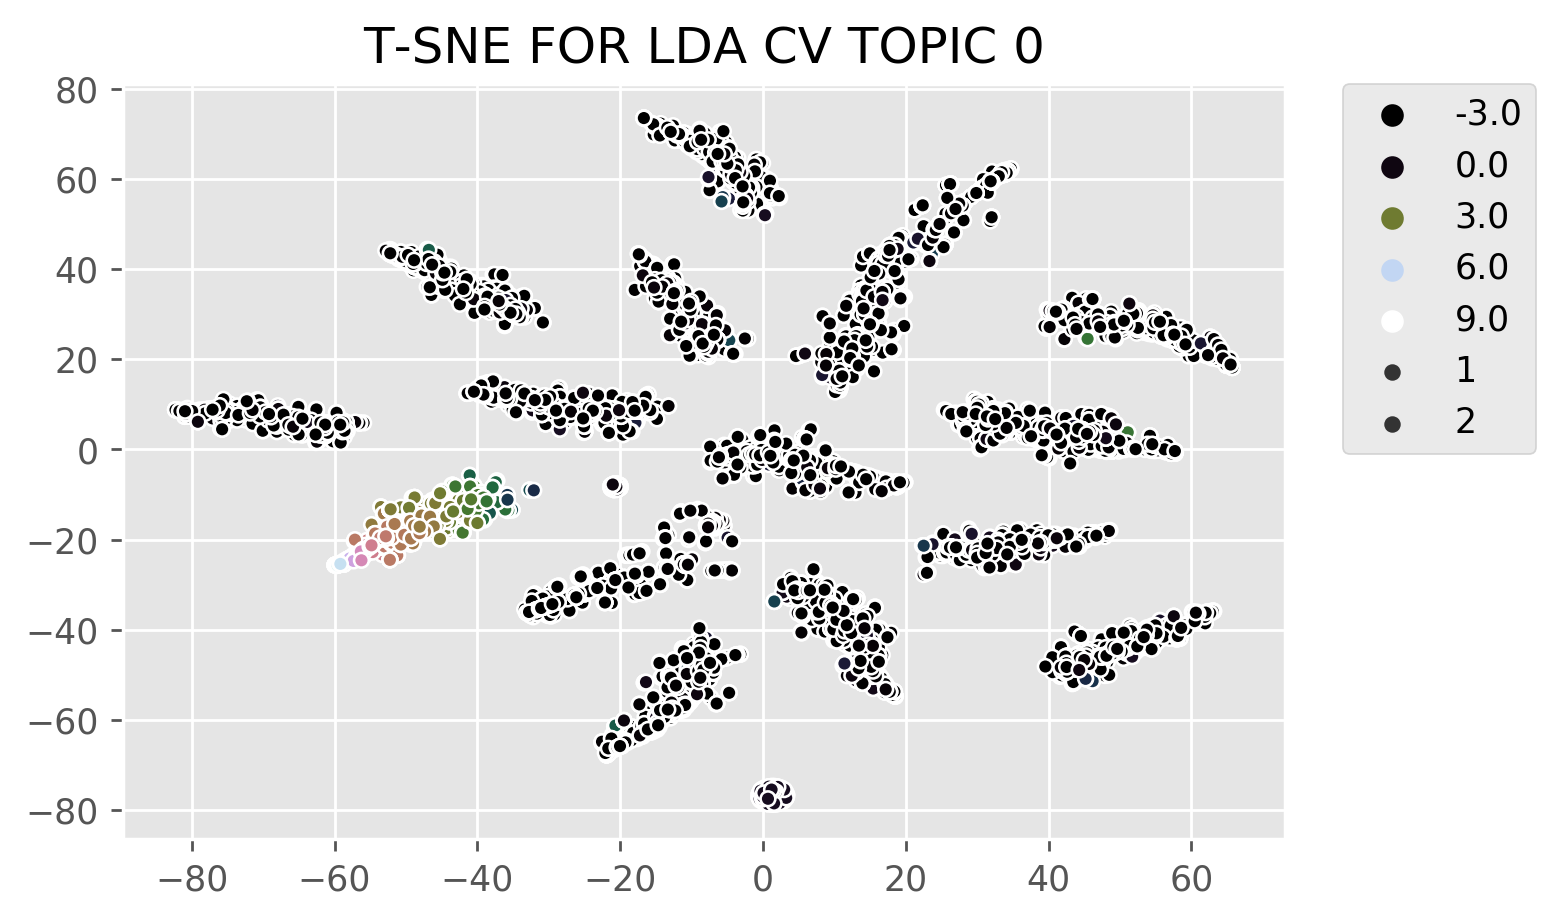

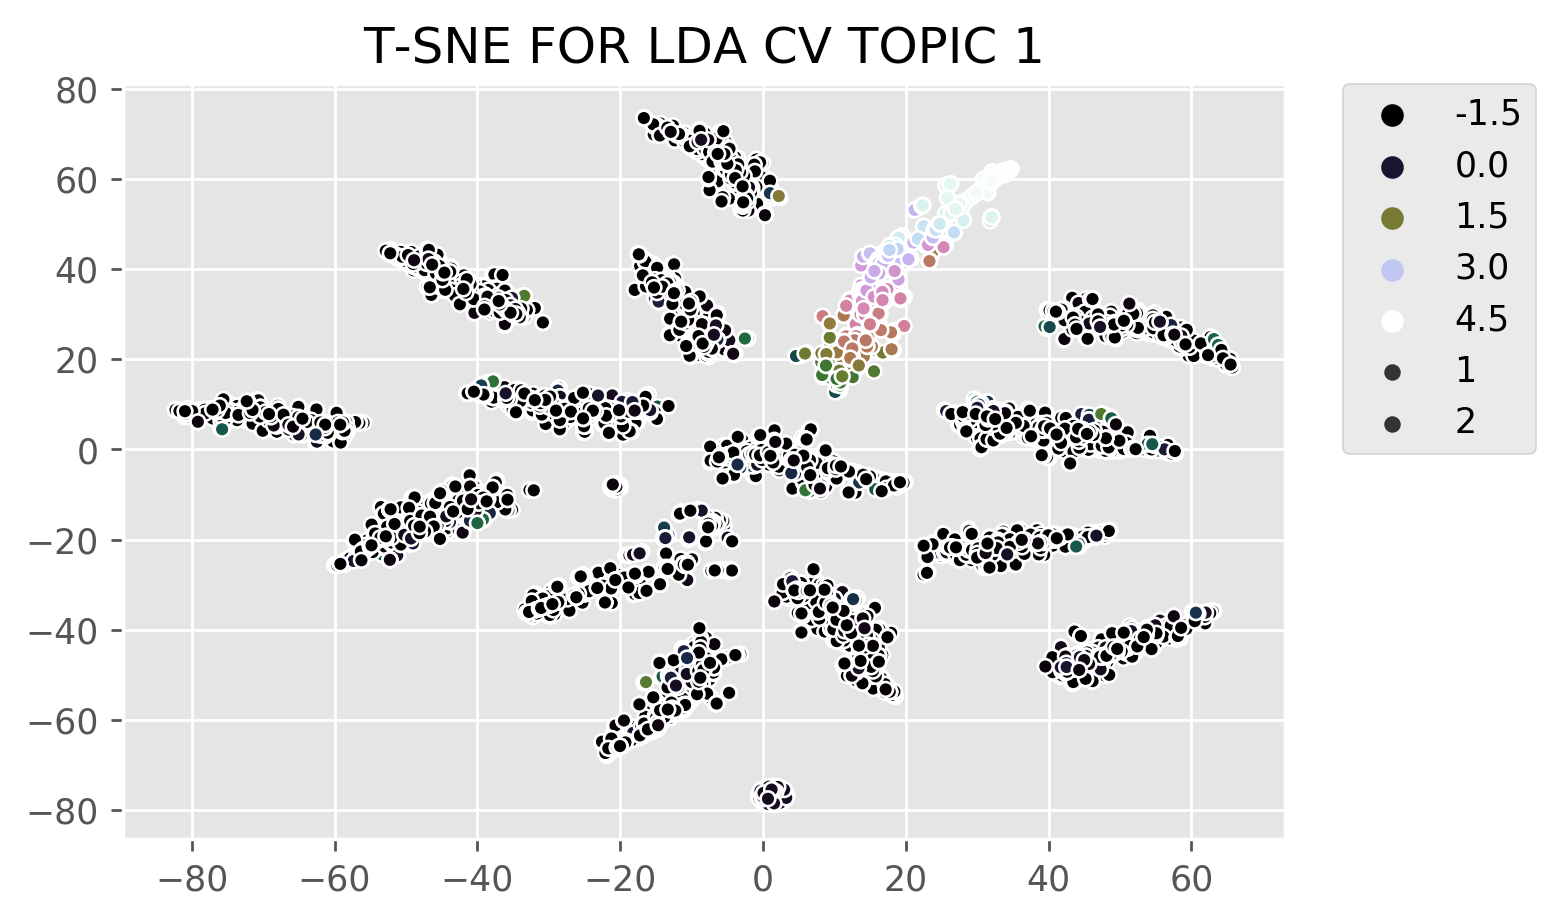

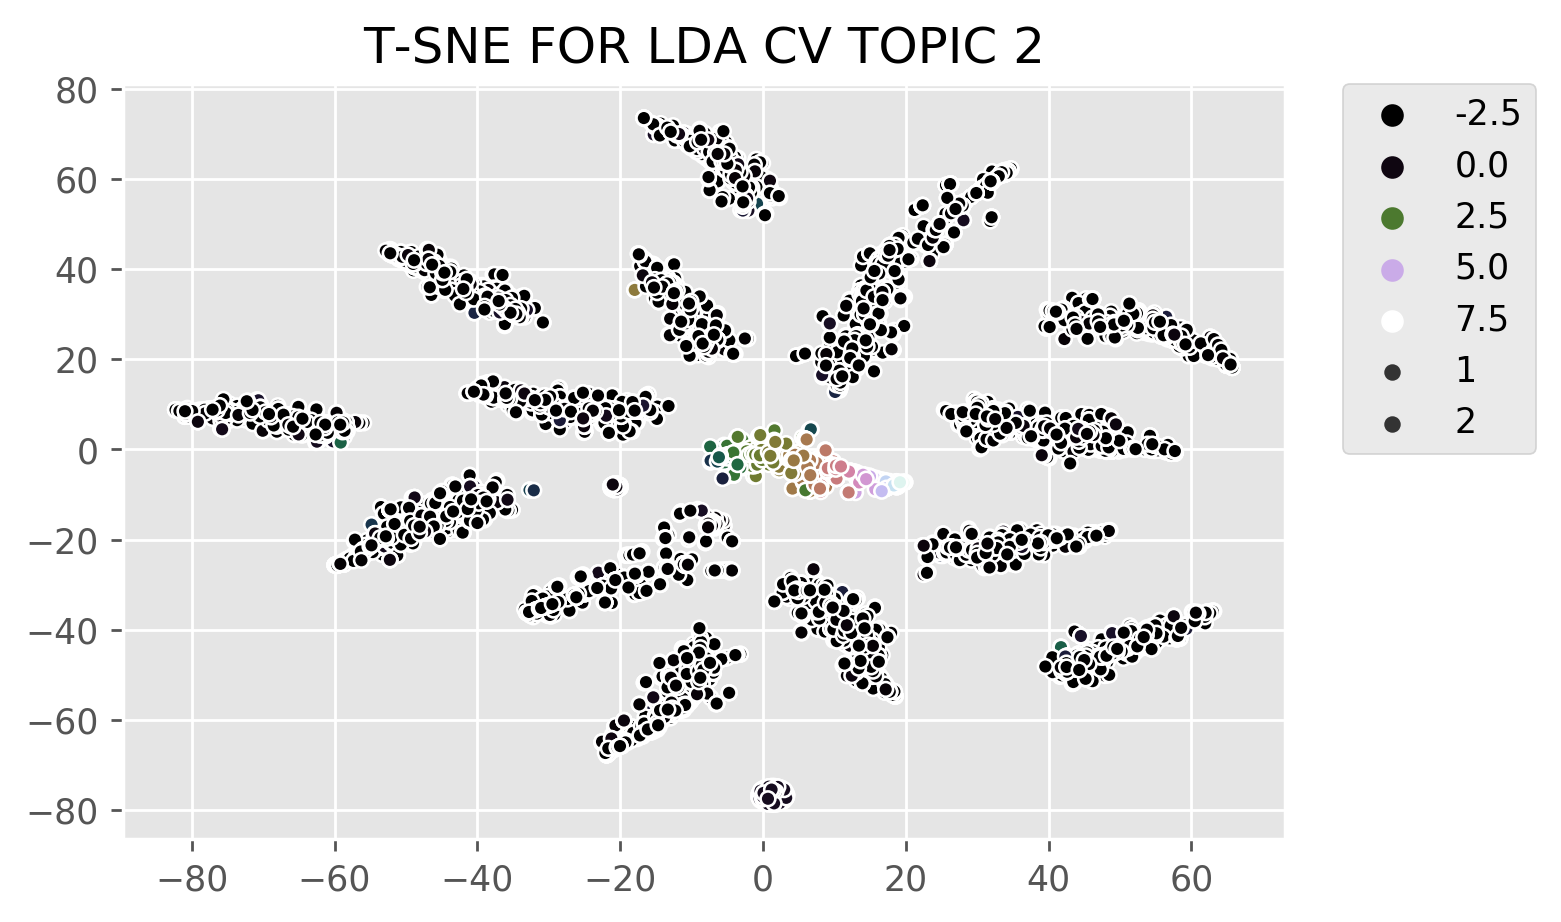

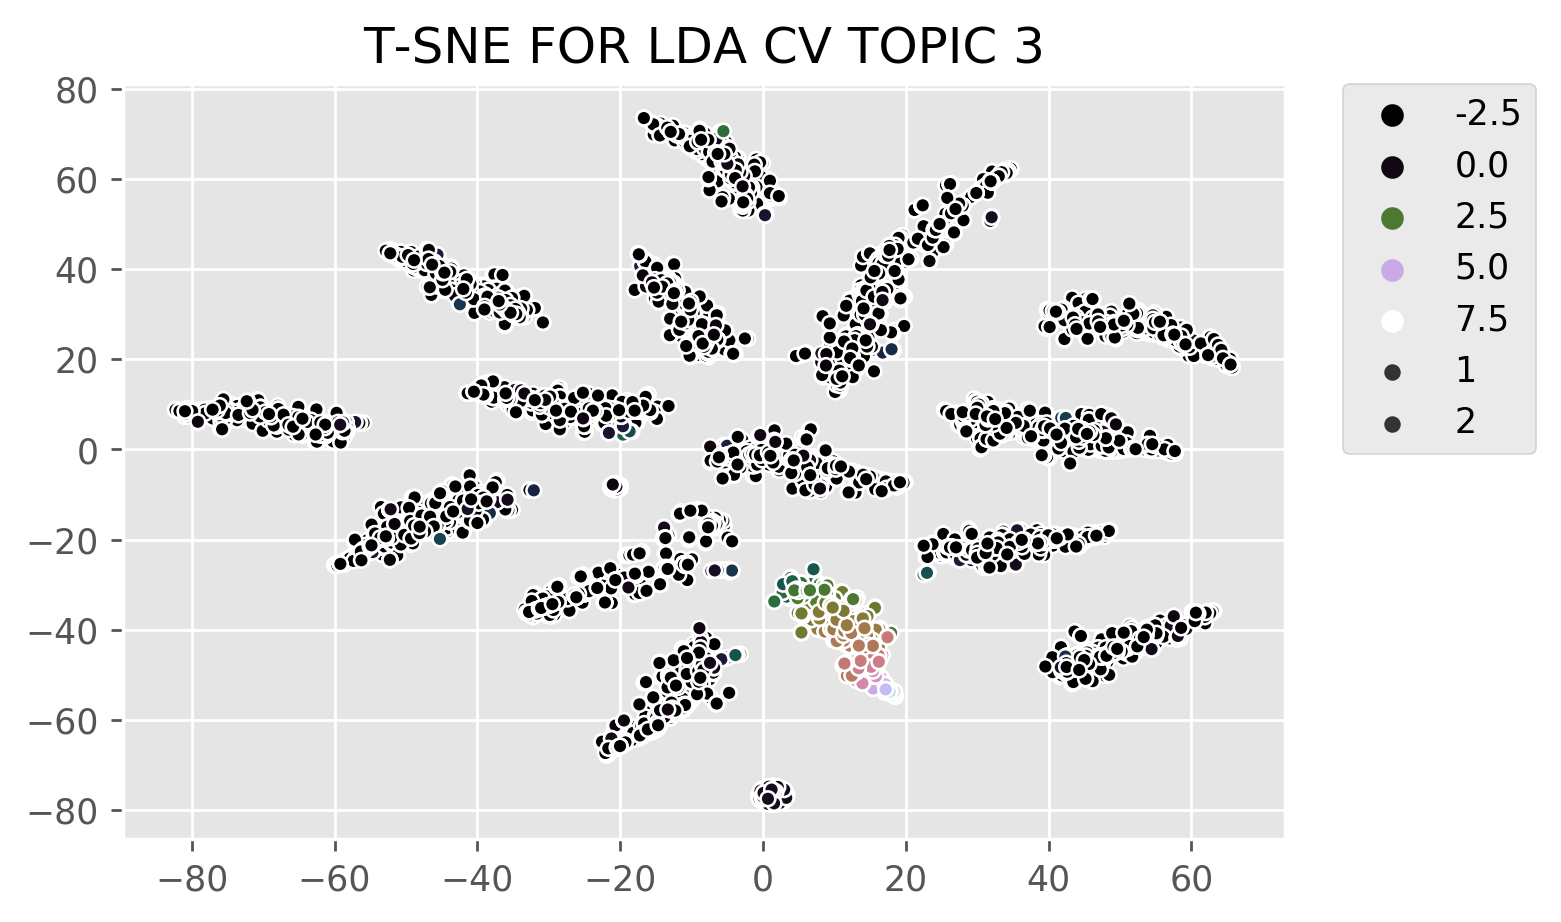

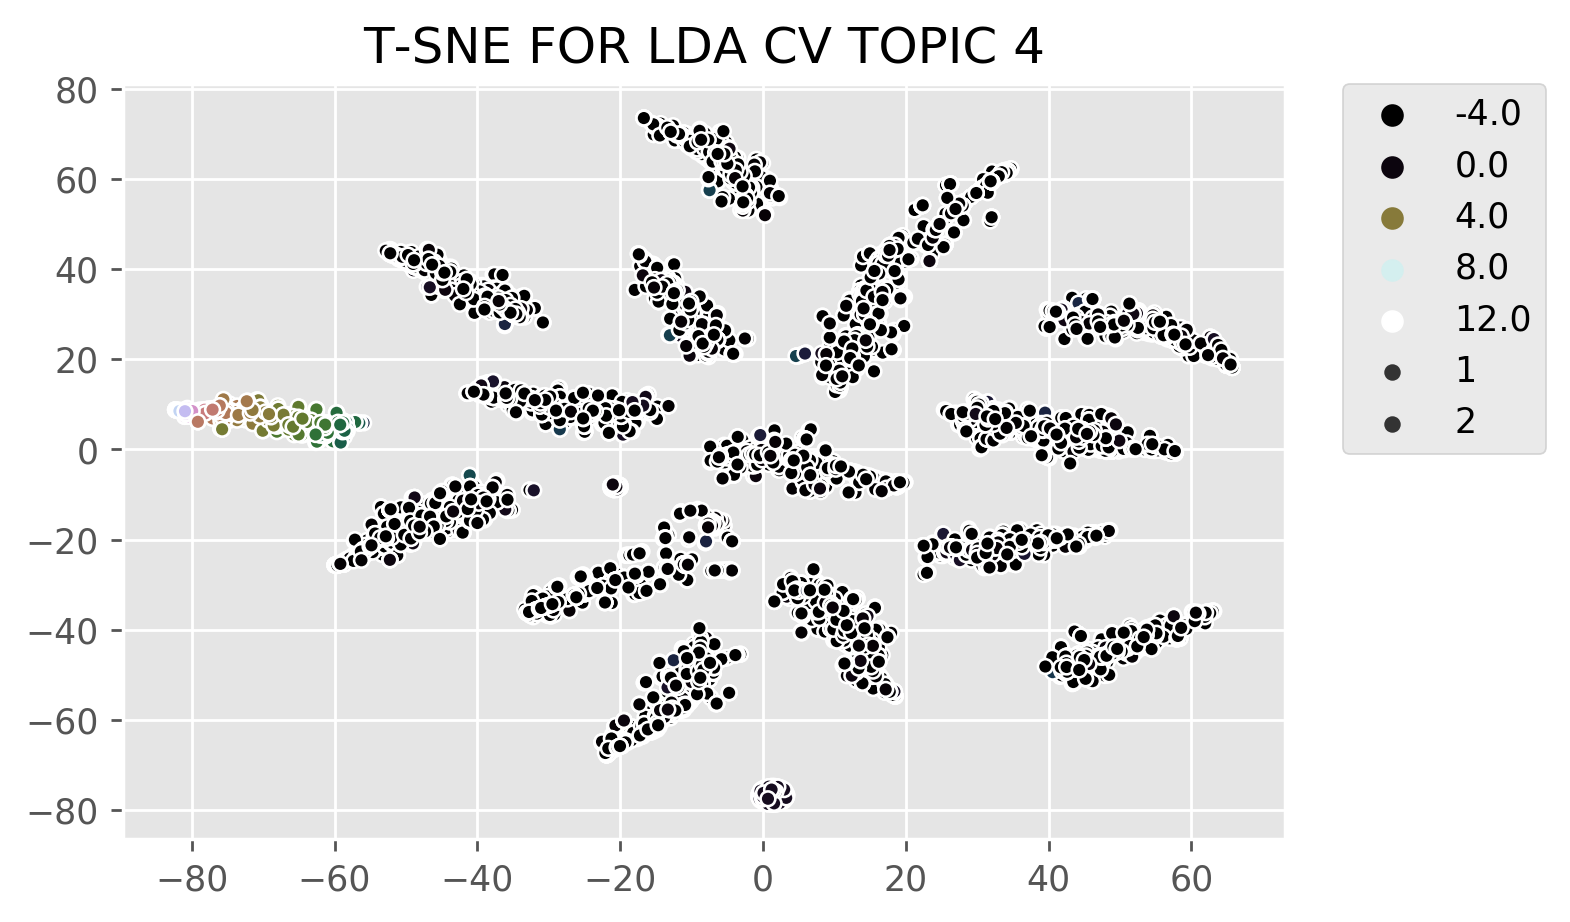

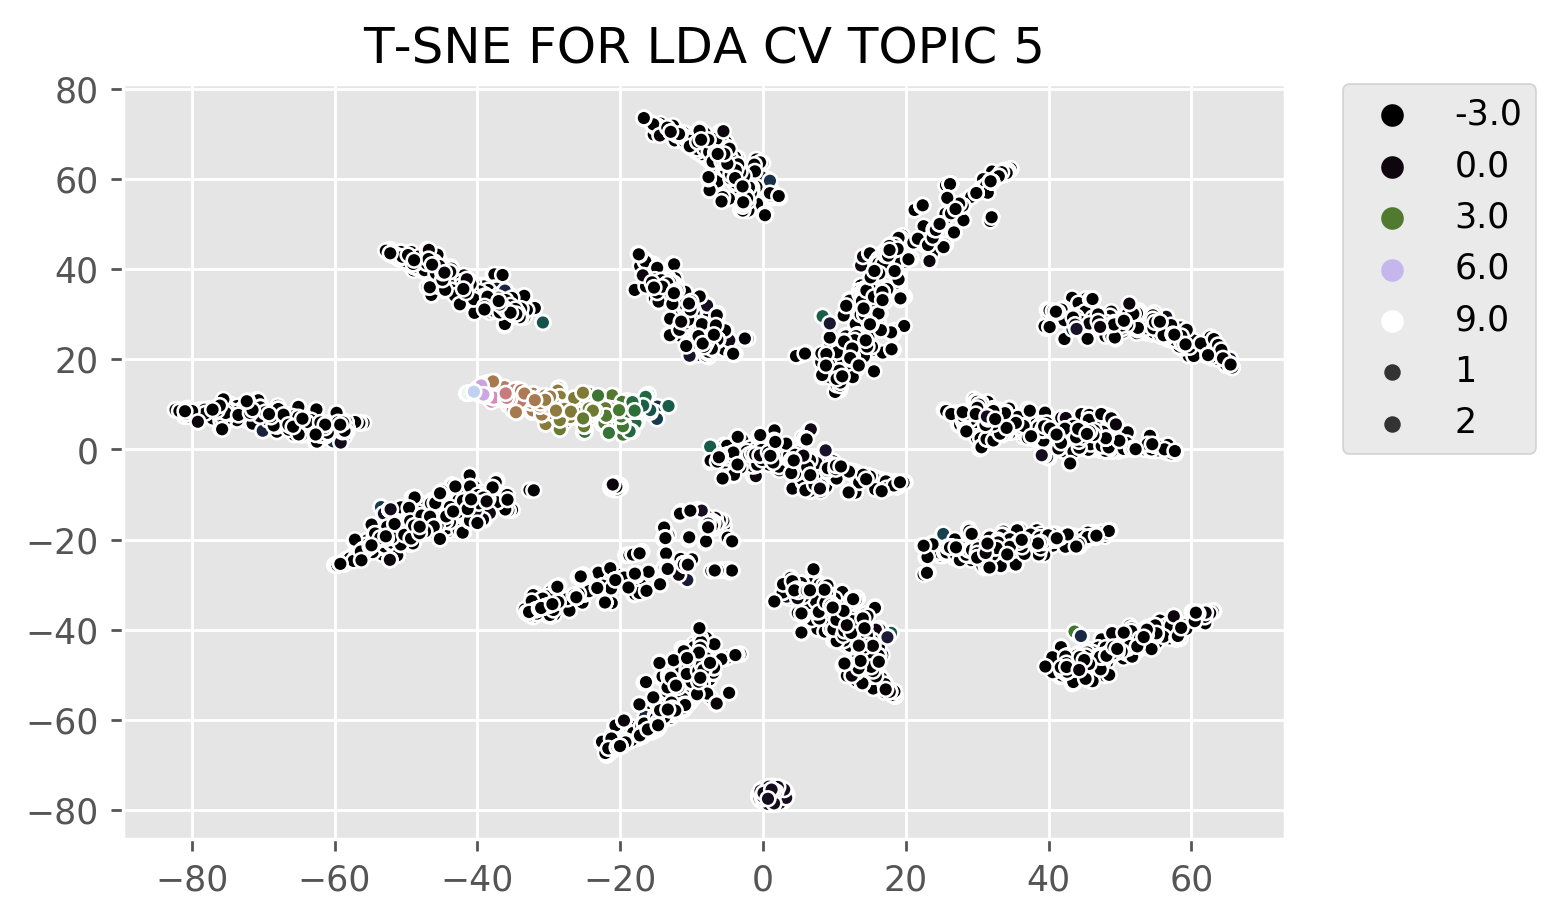

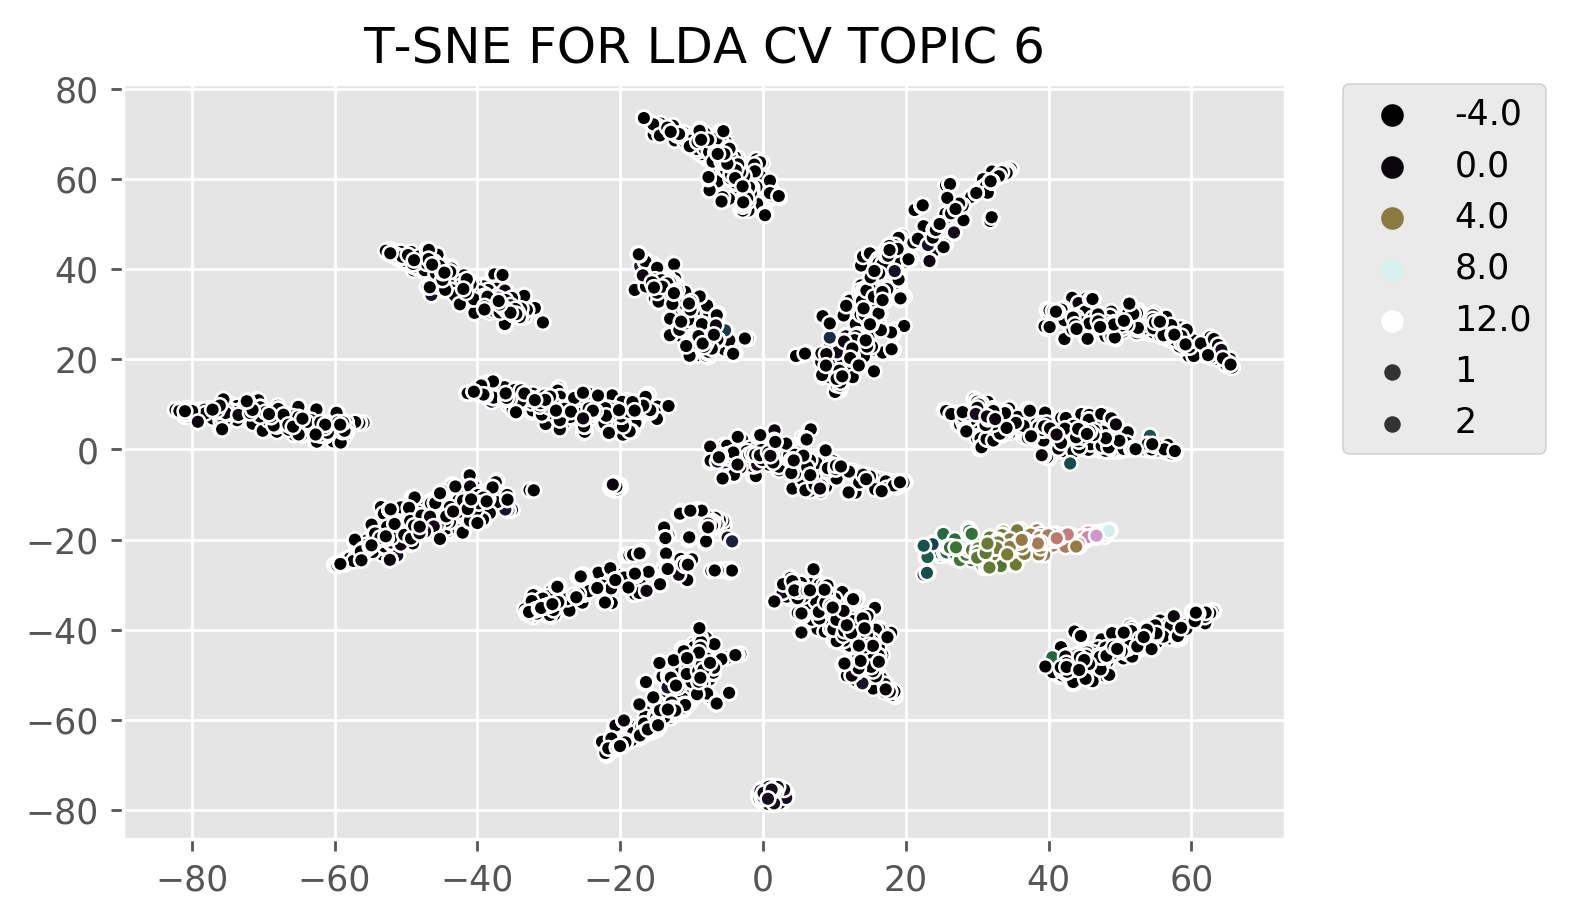

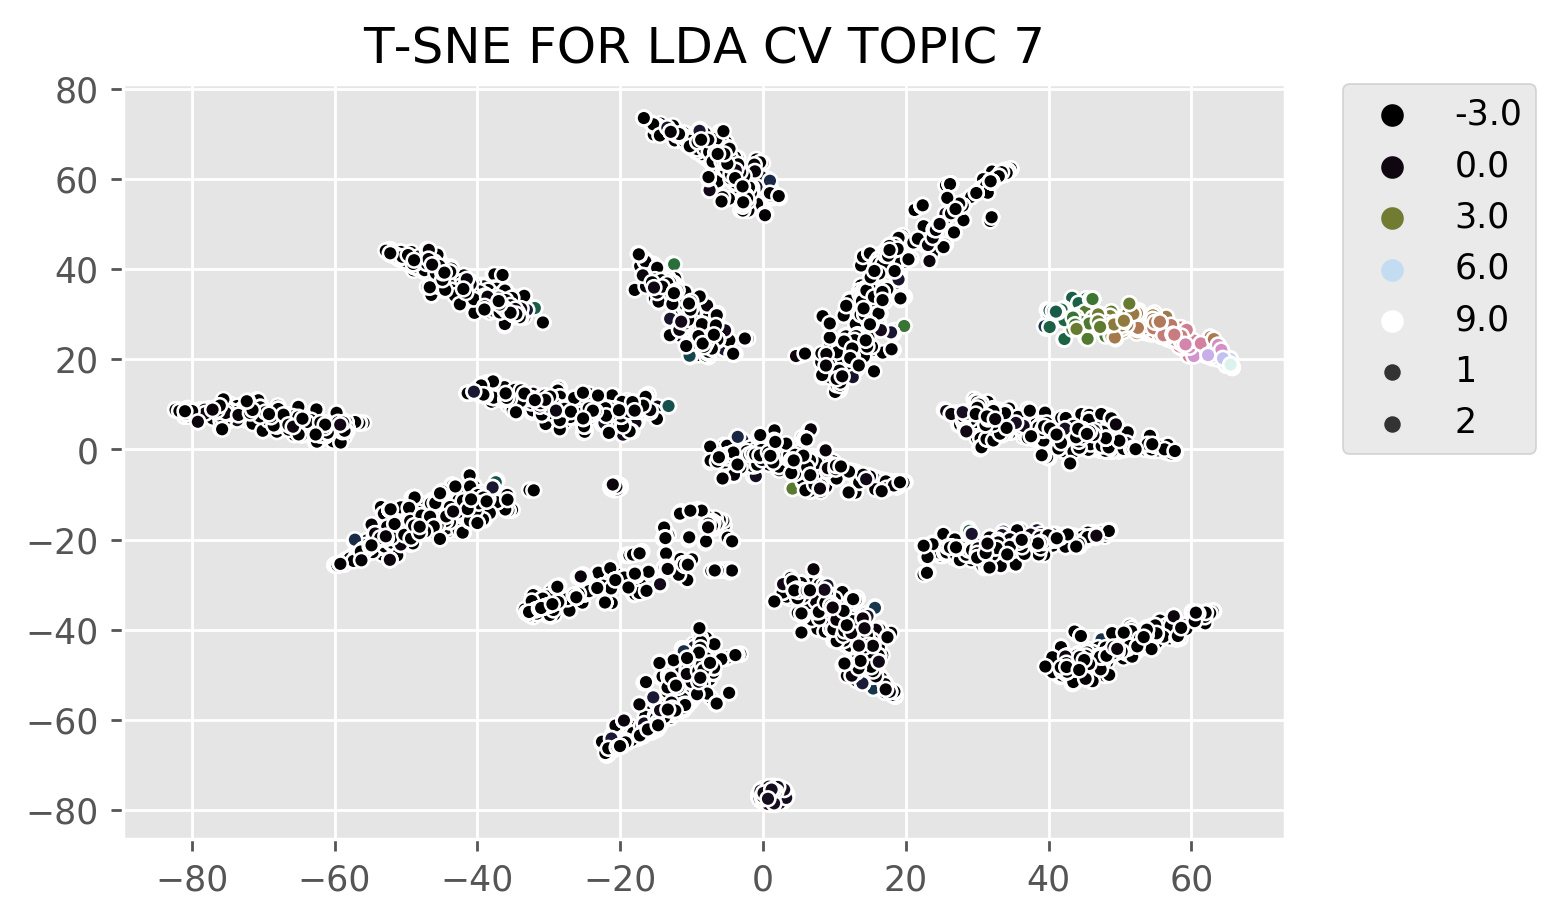

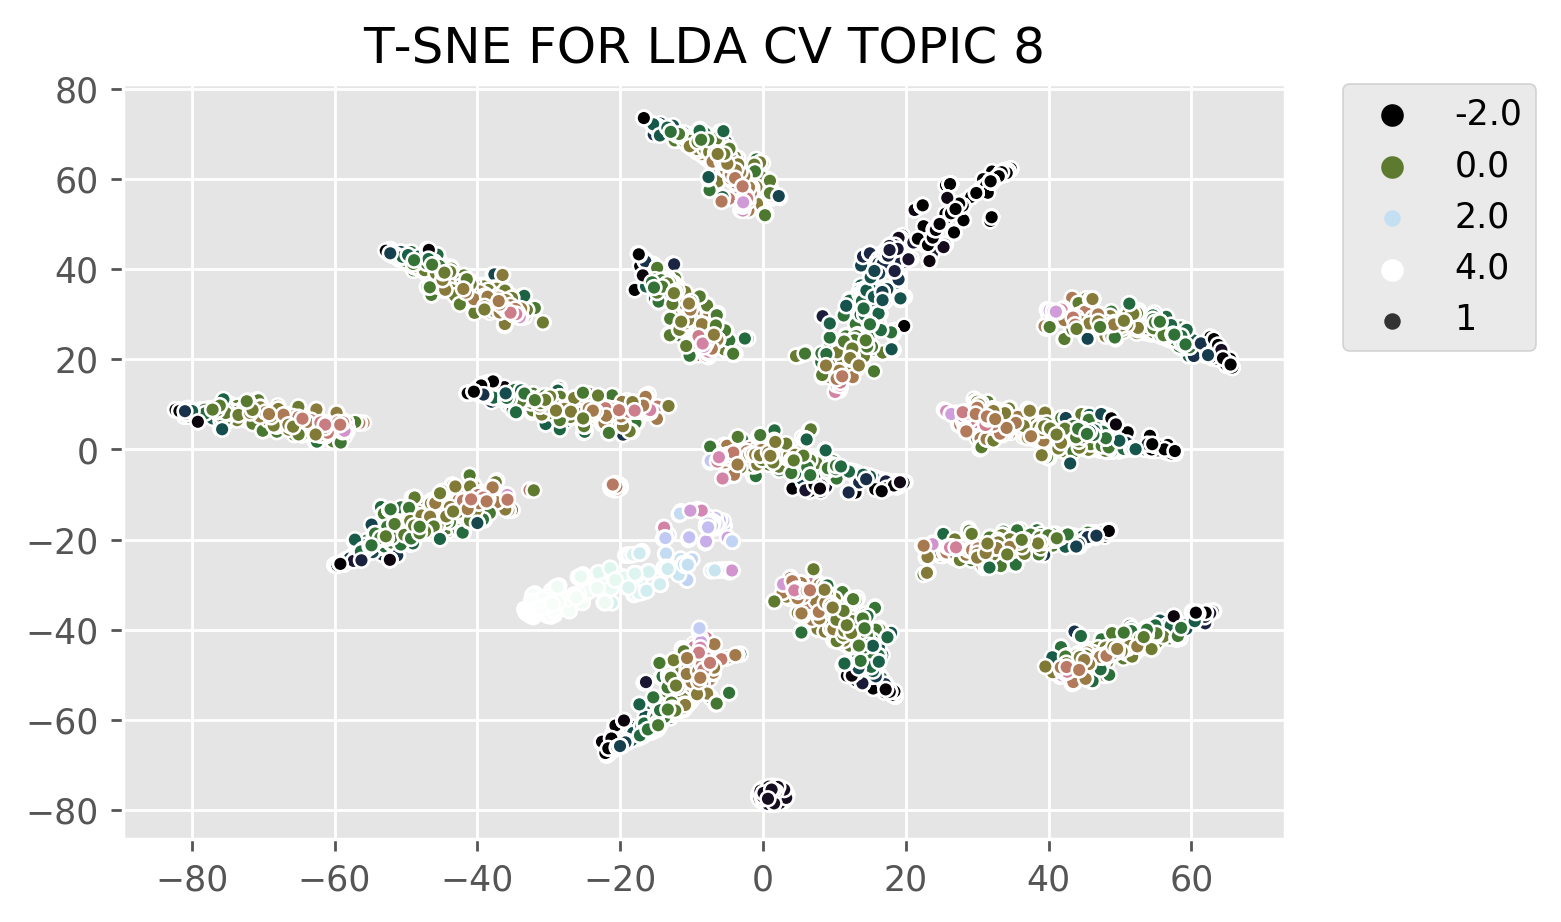

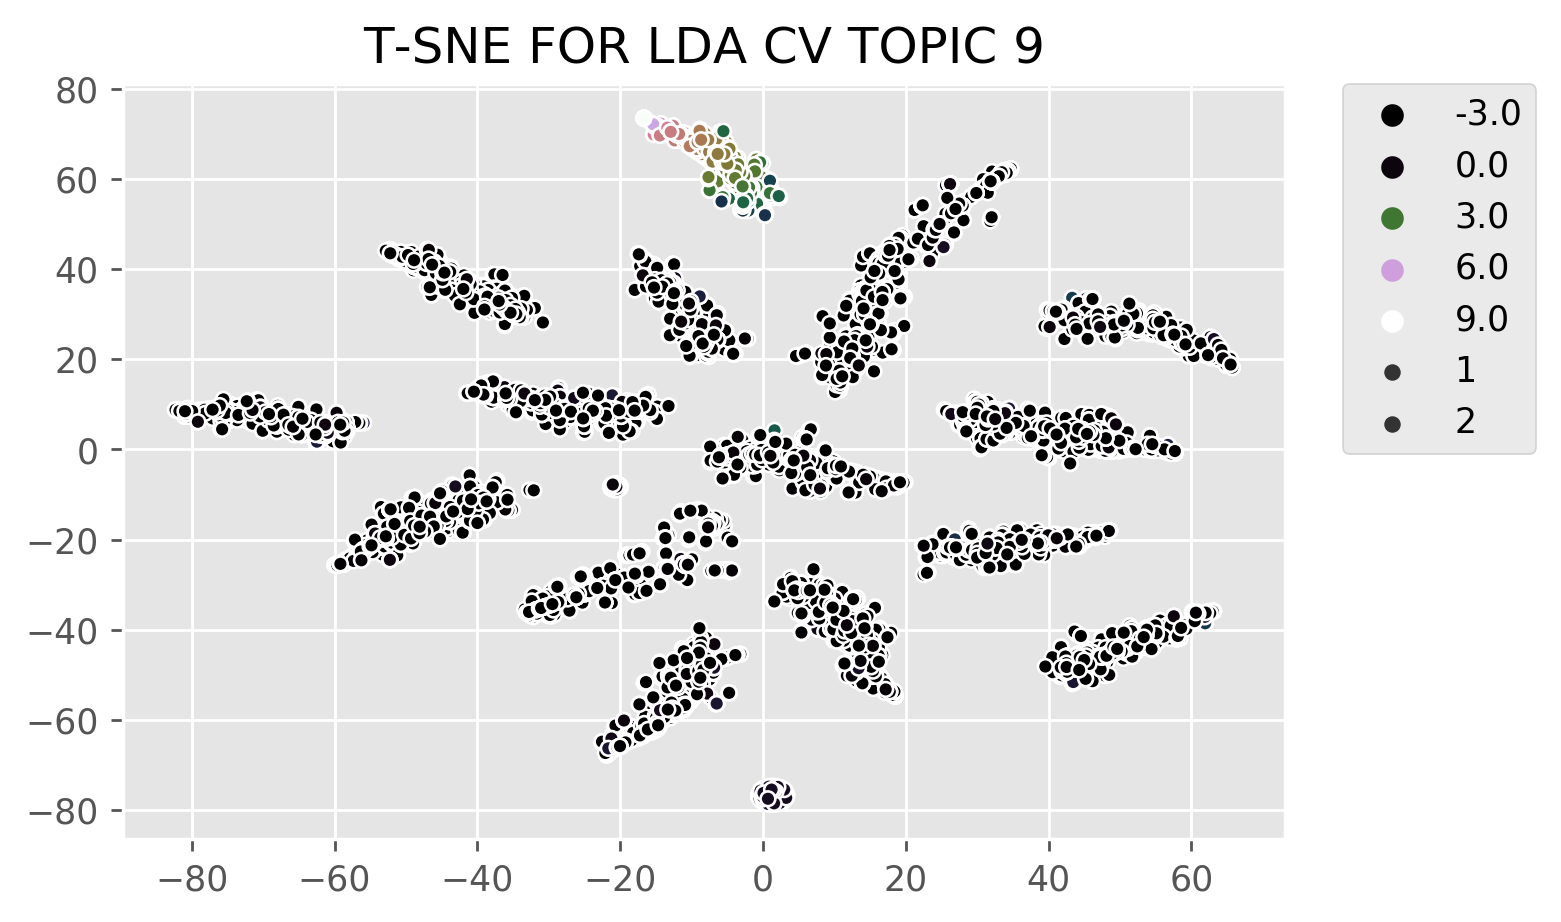

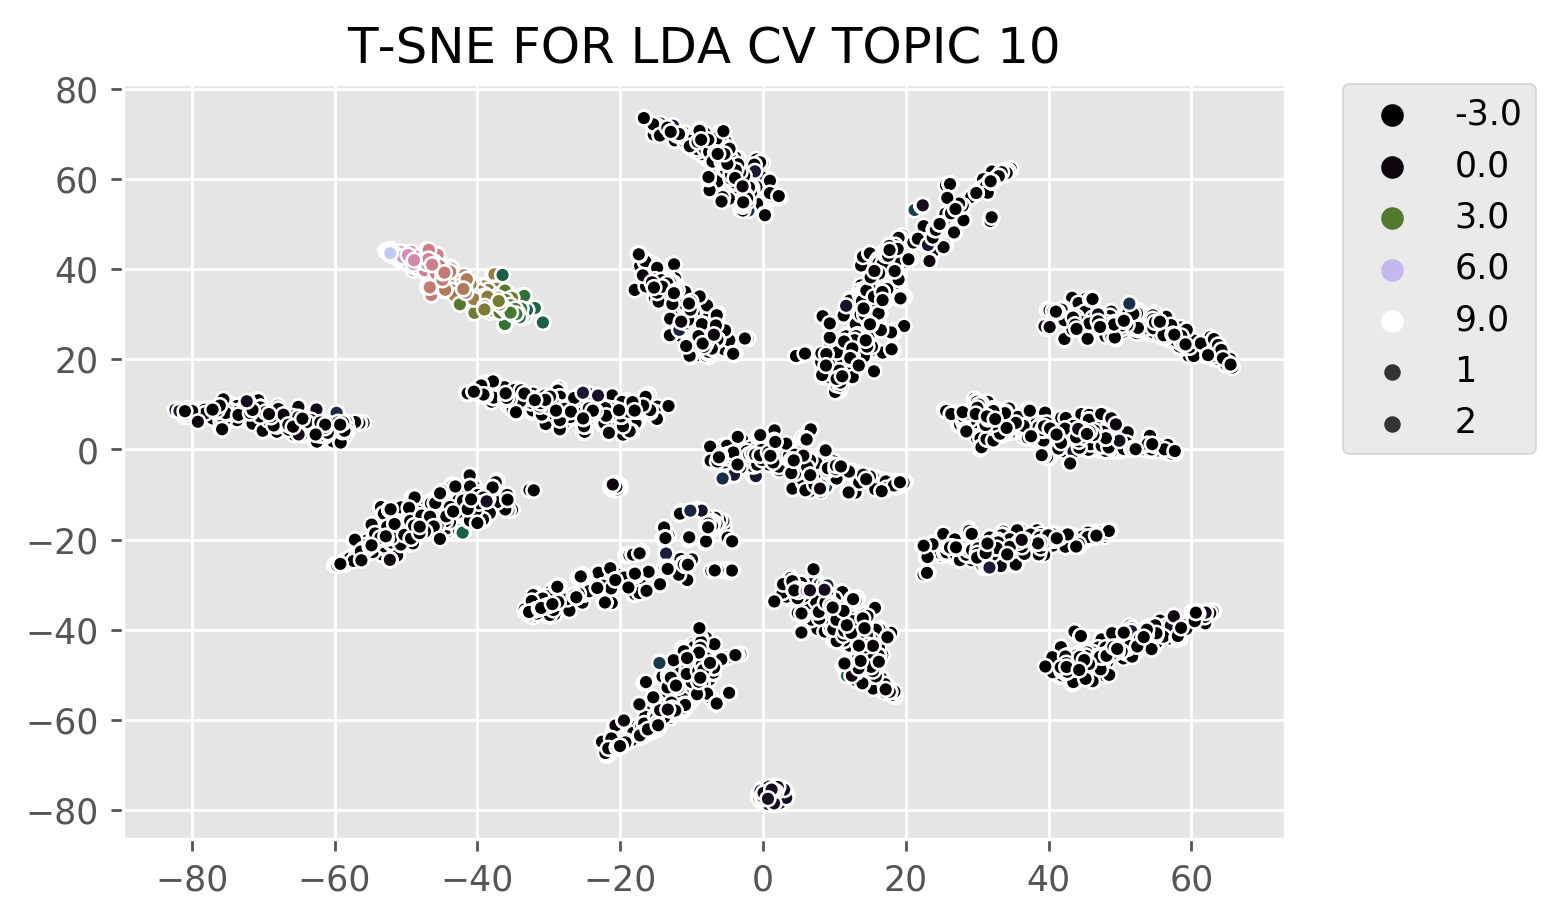

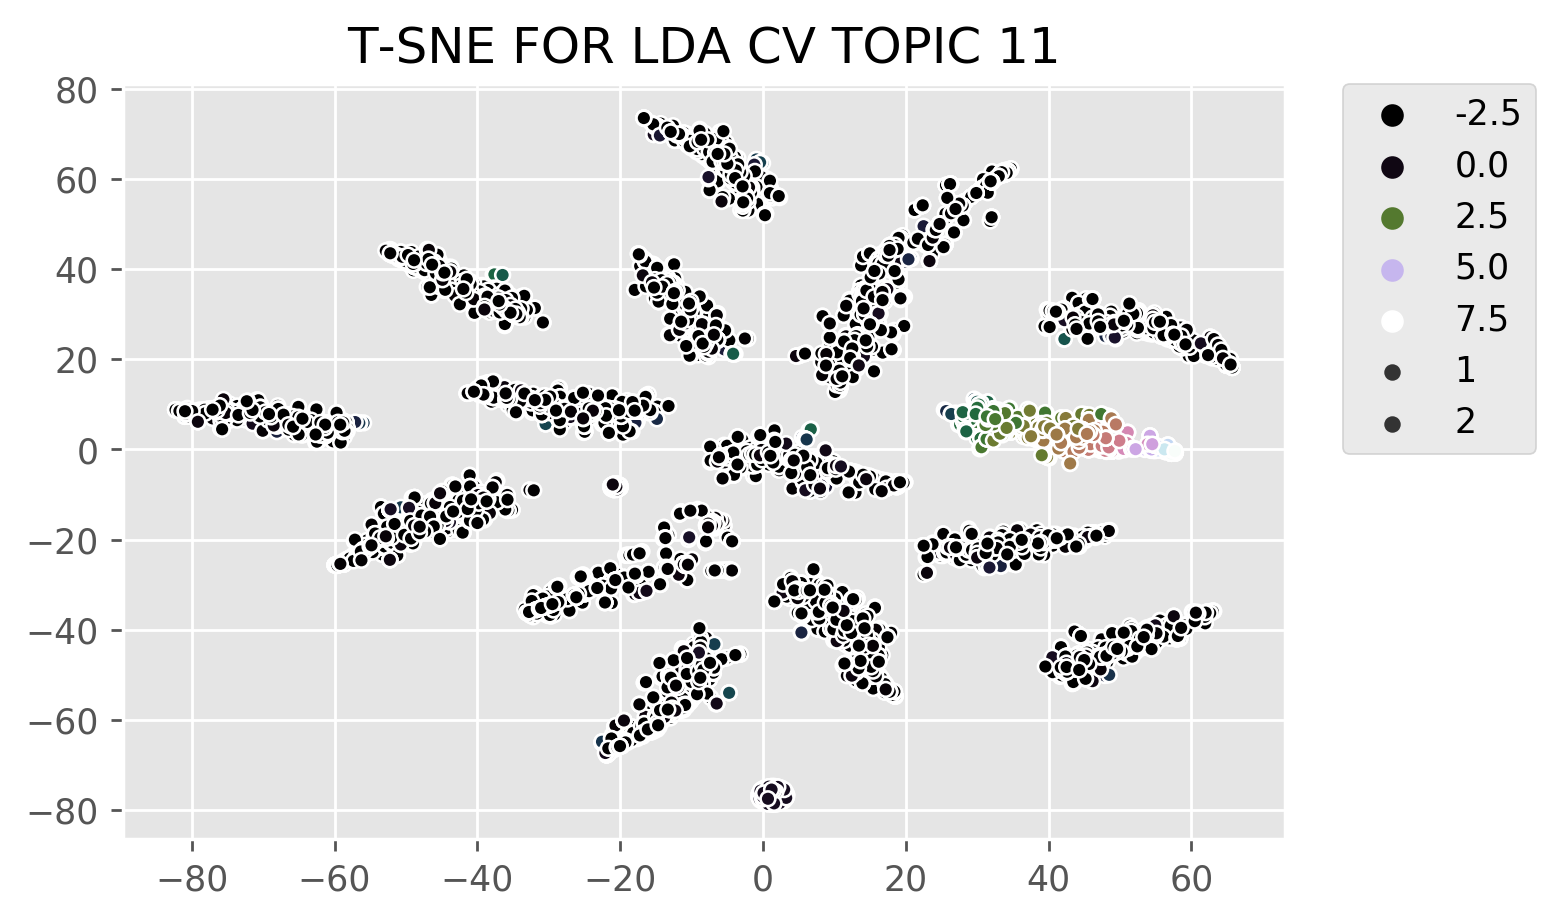

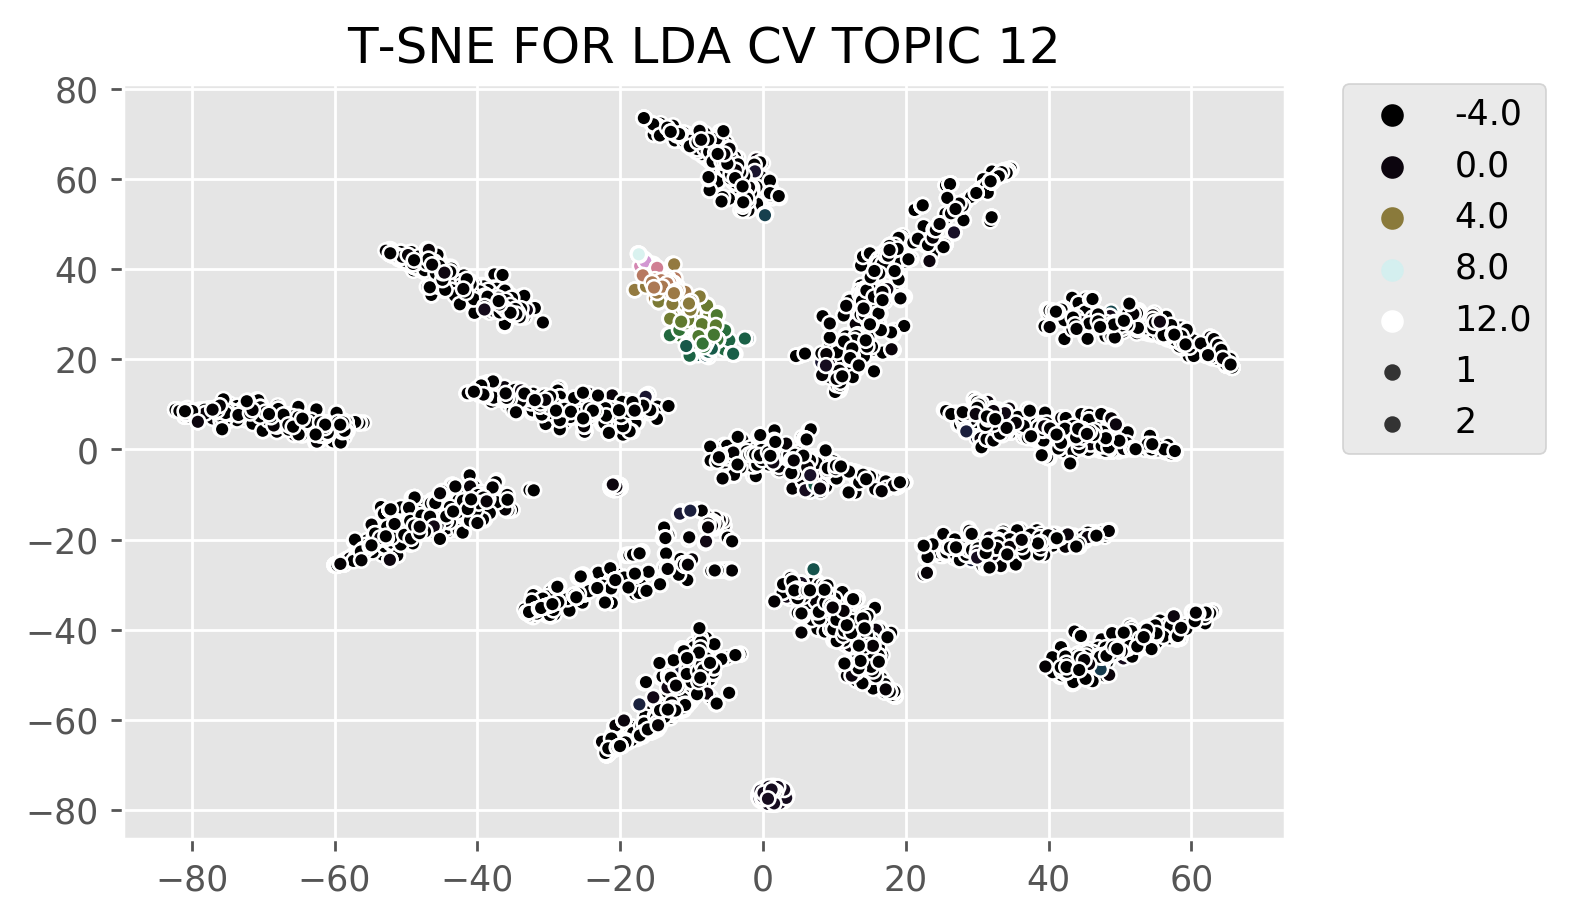

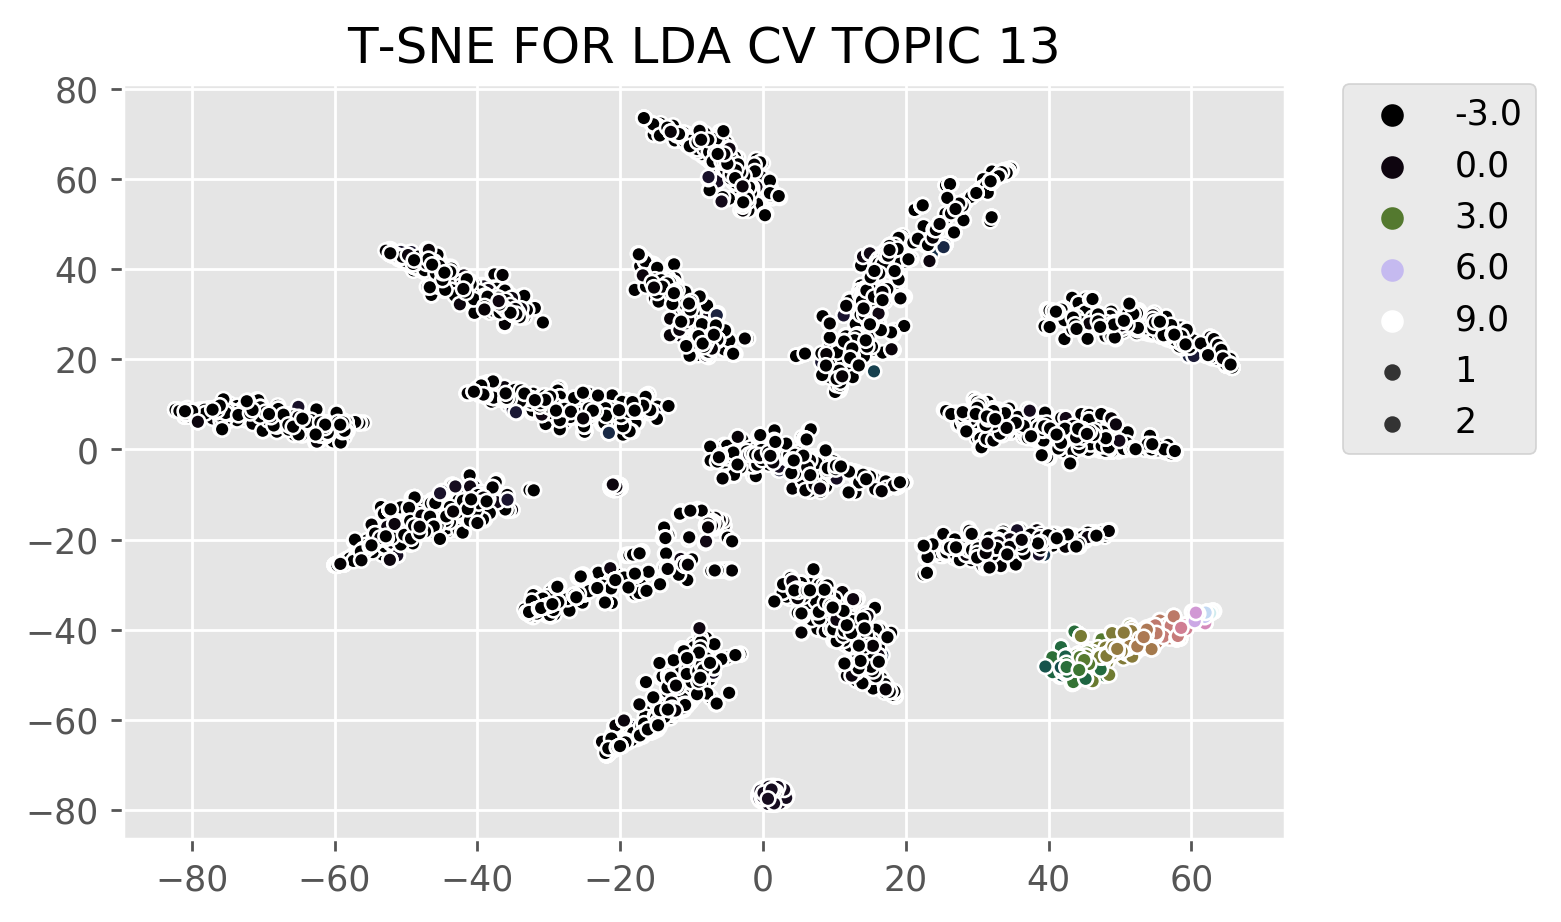

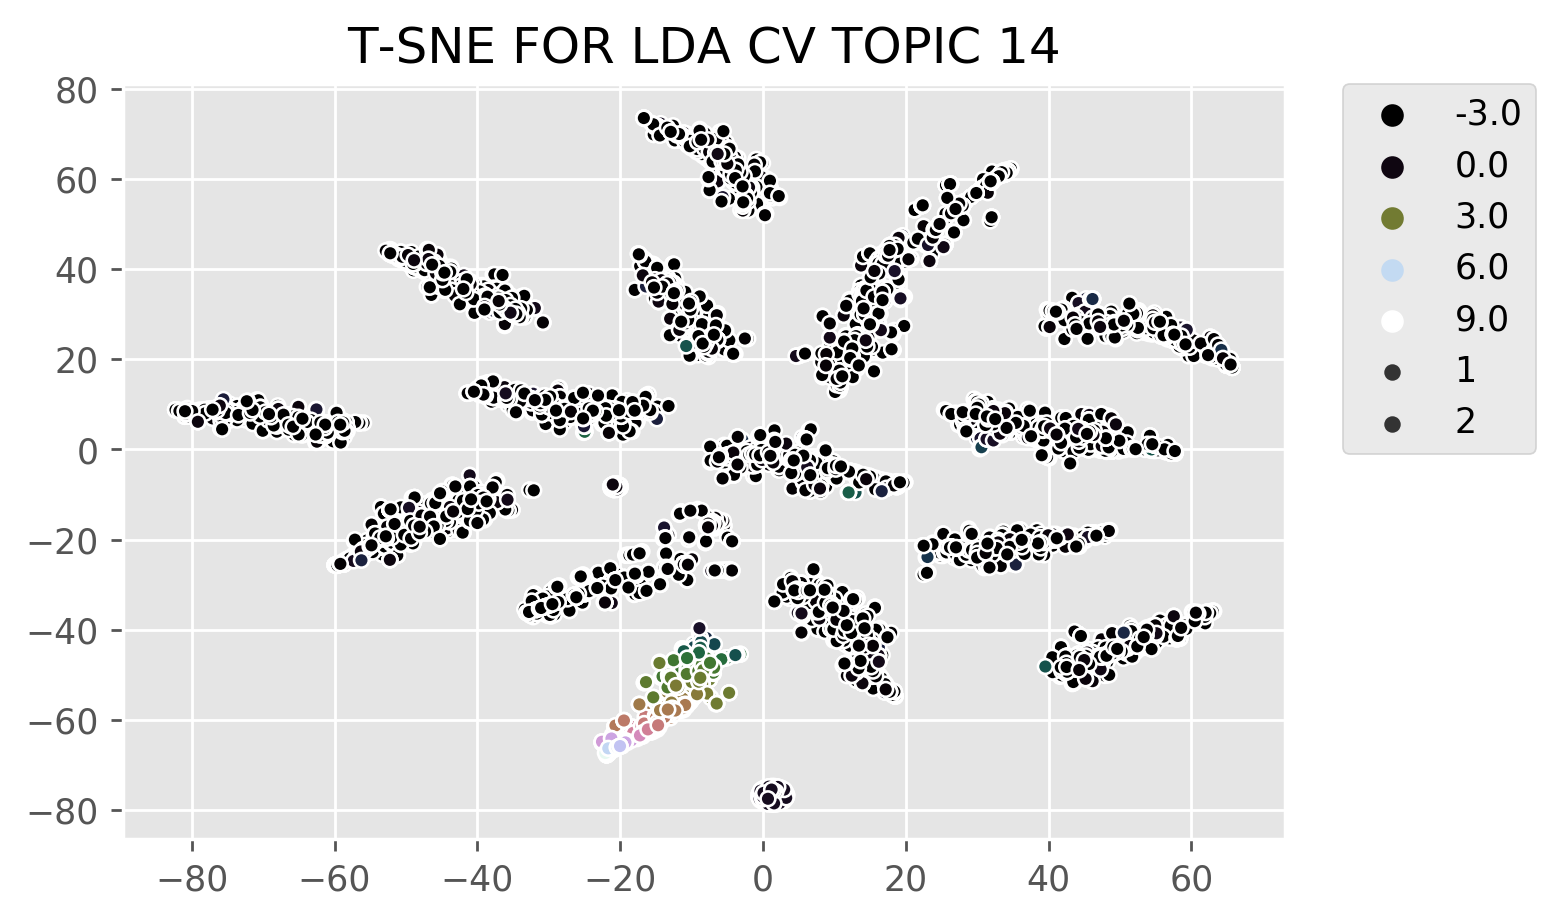

In [23]:
for i in range(15):
    plt.figure(dpi=250)
    plt.title("T-SNE FOR LDA CV TOPIC " + str(i))
    sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], lda_cv_data[:, i],
                   size = 2, palette = 'cubehelix', alpha = 'auto',
                  markers = '.', legend="brief");

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [12]:
ypred

array([3, 6, 6, ..., 6, 2, 6], dtype=int32)

In [13]:
clusters = ypred

In [14]:
def replace_cluster_with_topic(cluster, cluster_list):
    topics = ["Come up", 'Movement', 'Decision making', 'Religion + Desire', 'Love', 'Escaping the streets',
              'I see through you', 'Transparency', 'Origin Story', 'Transformation/New chapter', 'Better than you',
              'Cockiness', 'Support system', 'Rap essentials', 'Alpha Dog/Ego']
    cluster_list = [c if c!=cluster else topics[cluster] for c in cluster_list]
    
    return cluster_list

In [15]:
clusters

array([3, 6, 6, ..., 6, 2, 6], dtype=int32)

In [16]:
for i in range(15):
    clusters = replace_cluster_with_topic(i, clusters)
    
clusters

['Religion + Desire',
 'I see through you',
 'I see through you',
 'Movement',
 'I see through you',
 'Better than you',
 'Movement',
 'I see through you',
 'Better than you',
 'Transparency',
 'Love',
 'Escaping the streets',
 'Transparency',
 'Escaping the streets',
 'Escaping the streets',
 'Escaping the streets',
 'Escaping the streets',
 'Escaping the streets',
 'Escaping the streets',
 'Origin Story',
 'Alpha Dog/Ego',
 'Origin Story',
 'Come up',
 'I see through you',
 'Support system',
 'Movement',
 'Come up',
 'Escaping the streets',
 'Come up',
 'Come up',
 'Come up',
 'Movement',
 'Support system',
 'I see through you',
 'Support system',
 'I see through you',
 'Better than you',
 'Rap essentials',
 'Movement',
 'Support system',
 'Rap essentials',
 'Origin Story',
 'Better than you',
 'Better than you',
 'Support system',
 'Better than you',
 'Cockiness',
 'Better than you',
 'Better than you',
 'Religion + Desire',
 'I see through you',
 'Religion + Desire',
 'Escaping the

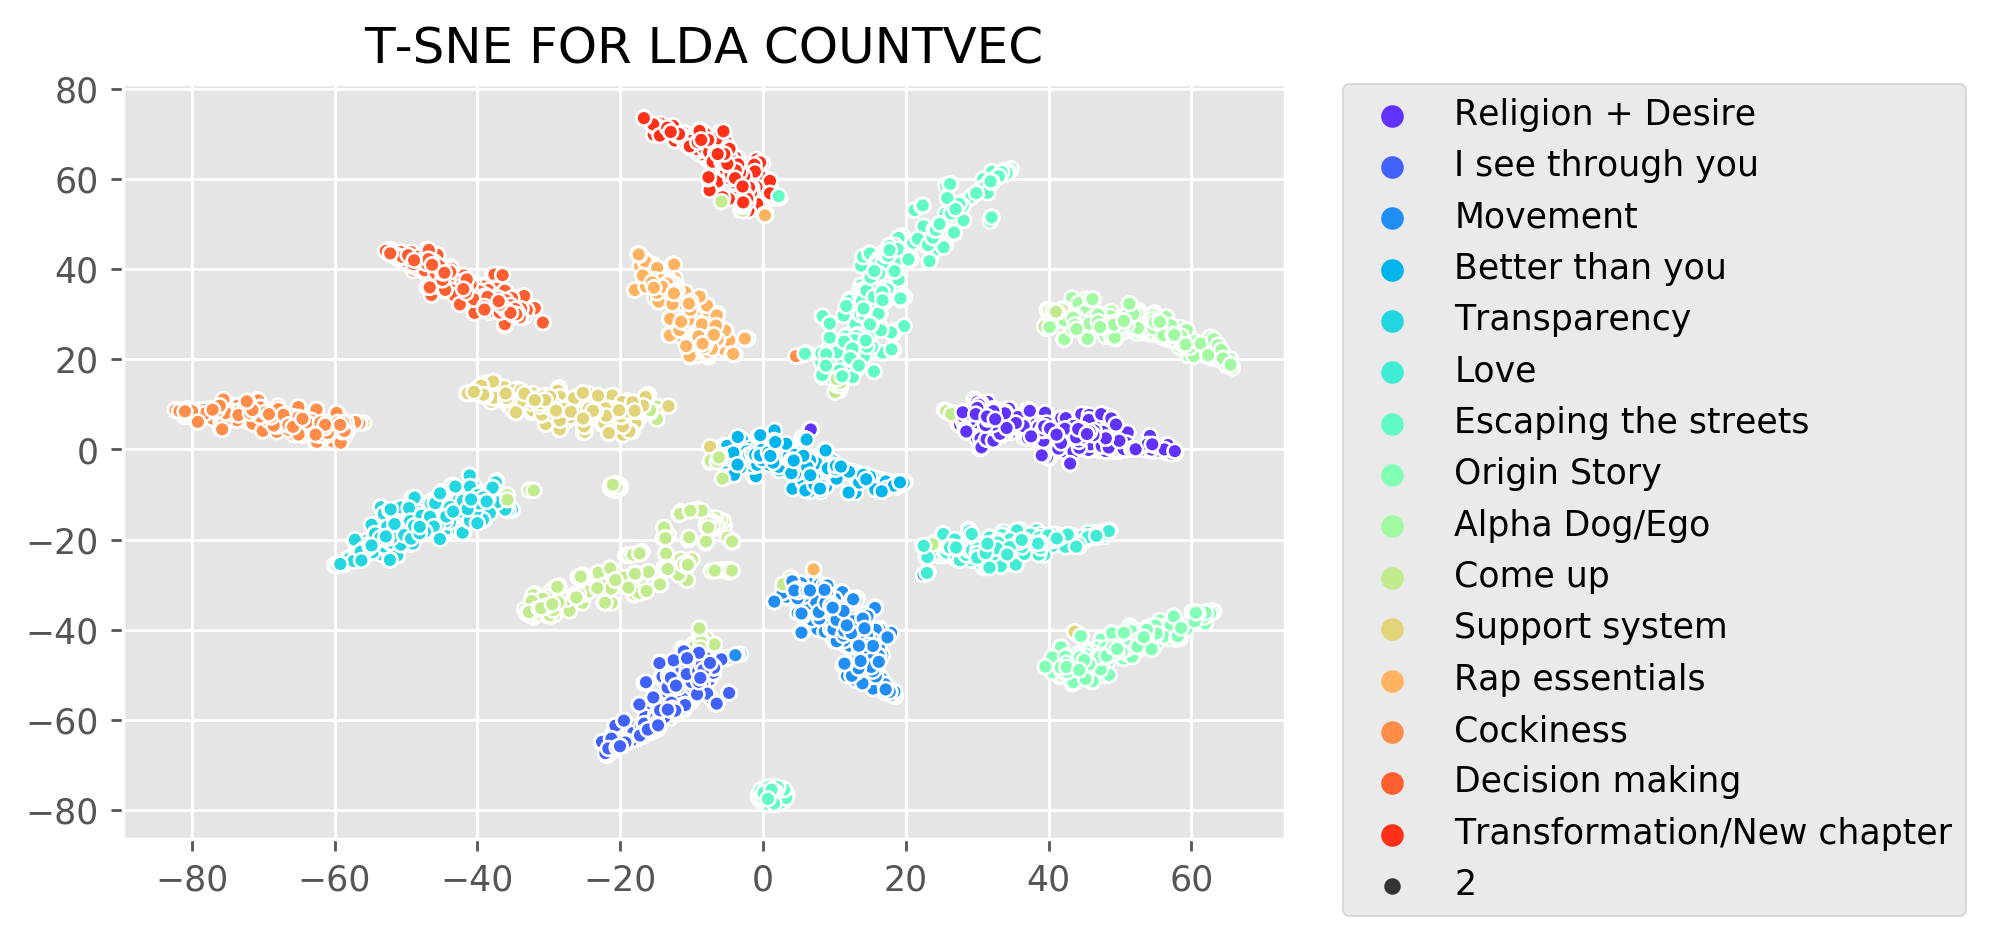

In [17]:
plt.figure(dpi=250)
plt.title("T-SNE FOR LDA COUNTVEC")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], clusters,
               size = 2, palette = 'rainbow', alpha = 'auto',
              markers = '.', legend="full");

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


plt.savefig('/Users/brendenrossin/github/Project_Fletcher/LDACVTSNElabeled.png', format='png', dpi=1000, bbox_inches="tight")

In [18]:
essentials_index = []

for index, row in enumerate(clusters):
    if row == 'Rap essentials':
        essentials_index.append(index)
        
len(essentials_index)

329

In [19]:
X_rap_essentials = X_embedded[essentials_index, 0]

In [20]:
Y_rap_essentials = X_embedded[essentials_index, 1]

Y_rap_essentials

array([ 24.176216,  31.248425,  27.822006,  42.798847,  42.798847,
        28.127968,  31.485043,  40.600277,  41.07385 ,  41.08082 ,
        42.125244,  37.91108 ,  41.048565,  36.125168,  30.969614,
        43.29508 ,  35.358807,  40.747658,  34.046158,  43.344276,
        36.820988,  43.388885,  35.103123,  39.812283,  35.59416 ,
        25.071058,  34.421688,  24.282507,  21.16221 ,  43.29519 ,
        35.358807,  25.612648,  25.612648,  25.612648,  27.383047,
        28.43249 ,  39.195686,  38.752533,  29.78178 ,  23.30458 ,
        27.665228,  36.149498,  25.587082,  24.481142,  25.931196,
        35.22998 ,  20.892557,  23.1789  ,  36.172863,  20.93954 ,
        23.00973 ,  43.145195,  43.145195,  34.60728 ,  25.40111 ,
        29.819756,  29.0432  ,  25.76574 ,  27.774227,  30.943207,
        21.79173 ,  33.26855 ,  40.802574,  40.906162,  25.978367,
        28.984592,  40.071545,  33.86971 ,  33.869743,  25.953485,
        25.61265 ,  33.77242 ,  25.61265 ,  25.61265 ,  27.385

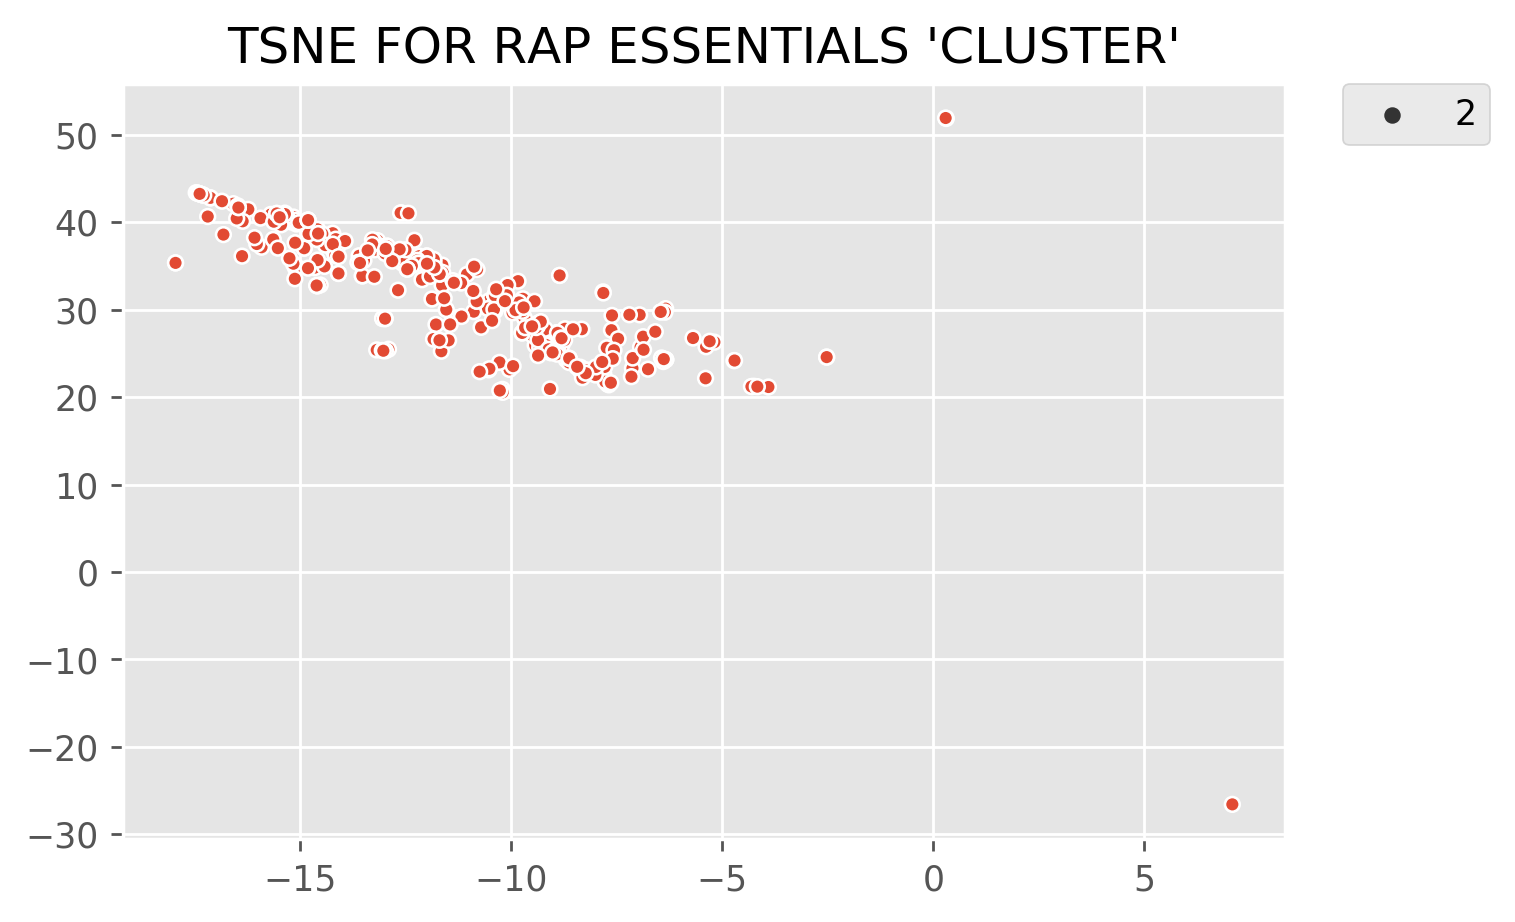

In [21]:
plt.figure(dpi=250)
plt.title("TSNE FOR RAP ESSENTIALS 'CLUSTER'")
sns.scatterplot(X_rap_essentials, Y_rap_essentials,
               size = 2, palette = 'rainbow', alpha = 'auto',
              markers = '.', legend="full");

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

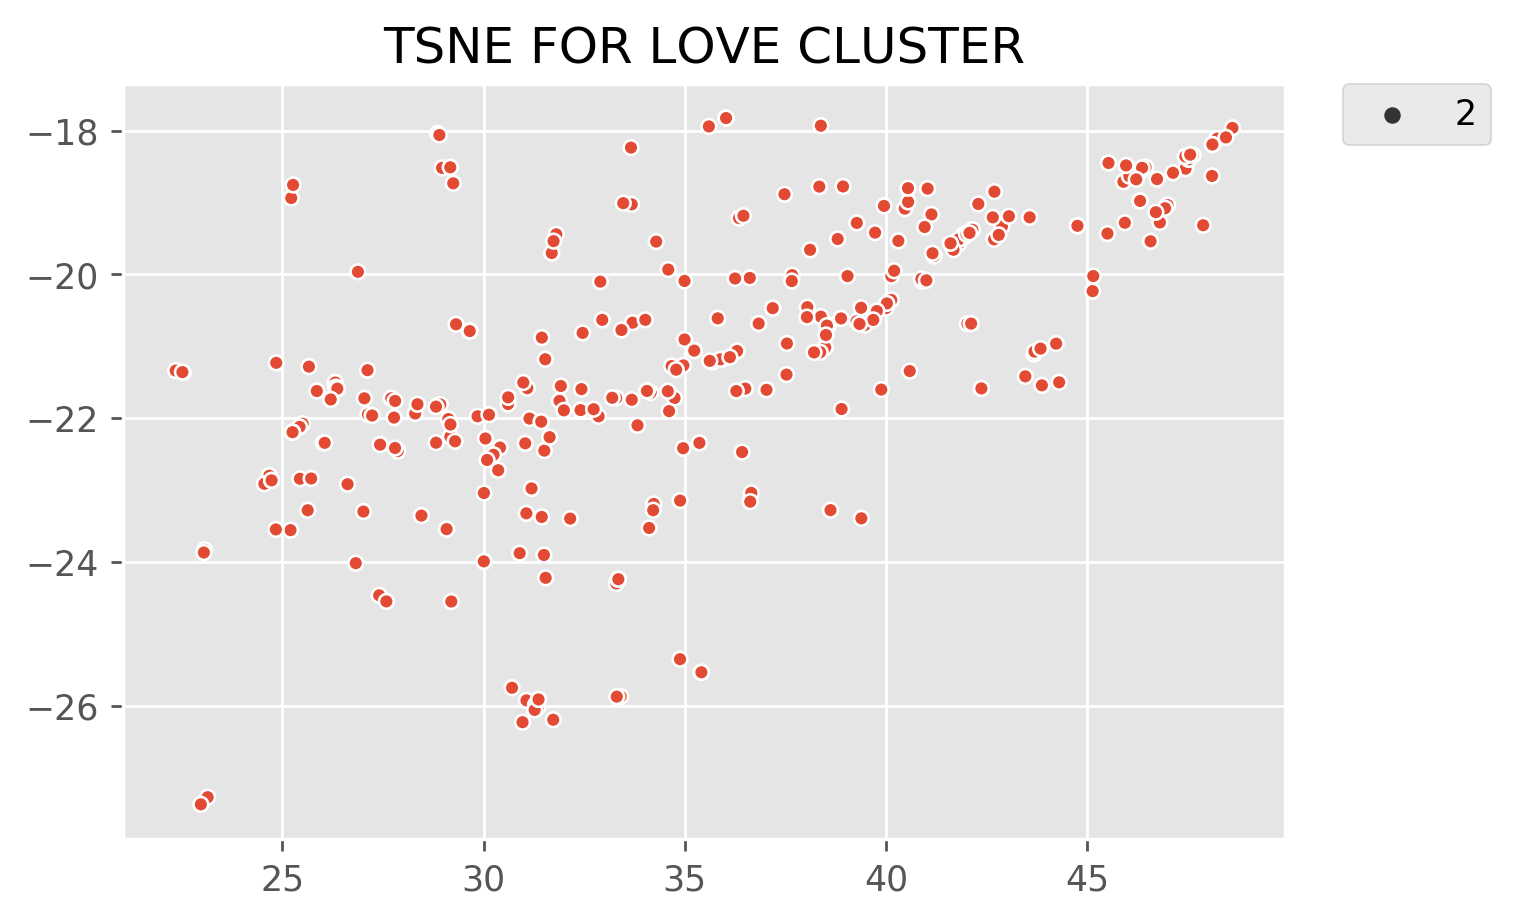

In [22]:
love_index = []

for index, row in enumerate(clusters):
    if row == 'Love':
        love_index.append(index)
        
len(love_index)

X_LOVE = X_embedded[love_index, 0]
Y_LOVE = X_embedded[love_index, 1]

plt.figure(dpi=250)
plt.title("TSNE FOR LOVE CLUSTER")
sns.scatterplot(X_LOVE, Y_LOVE,
               size = 2, palette = 'rainbow', alpha = 'auto',
              markers = '.', legend="full");

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

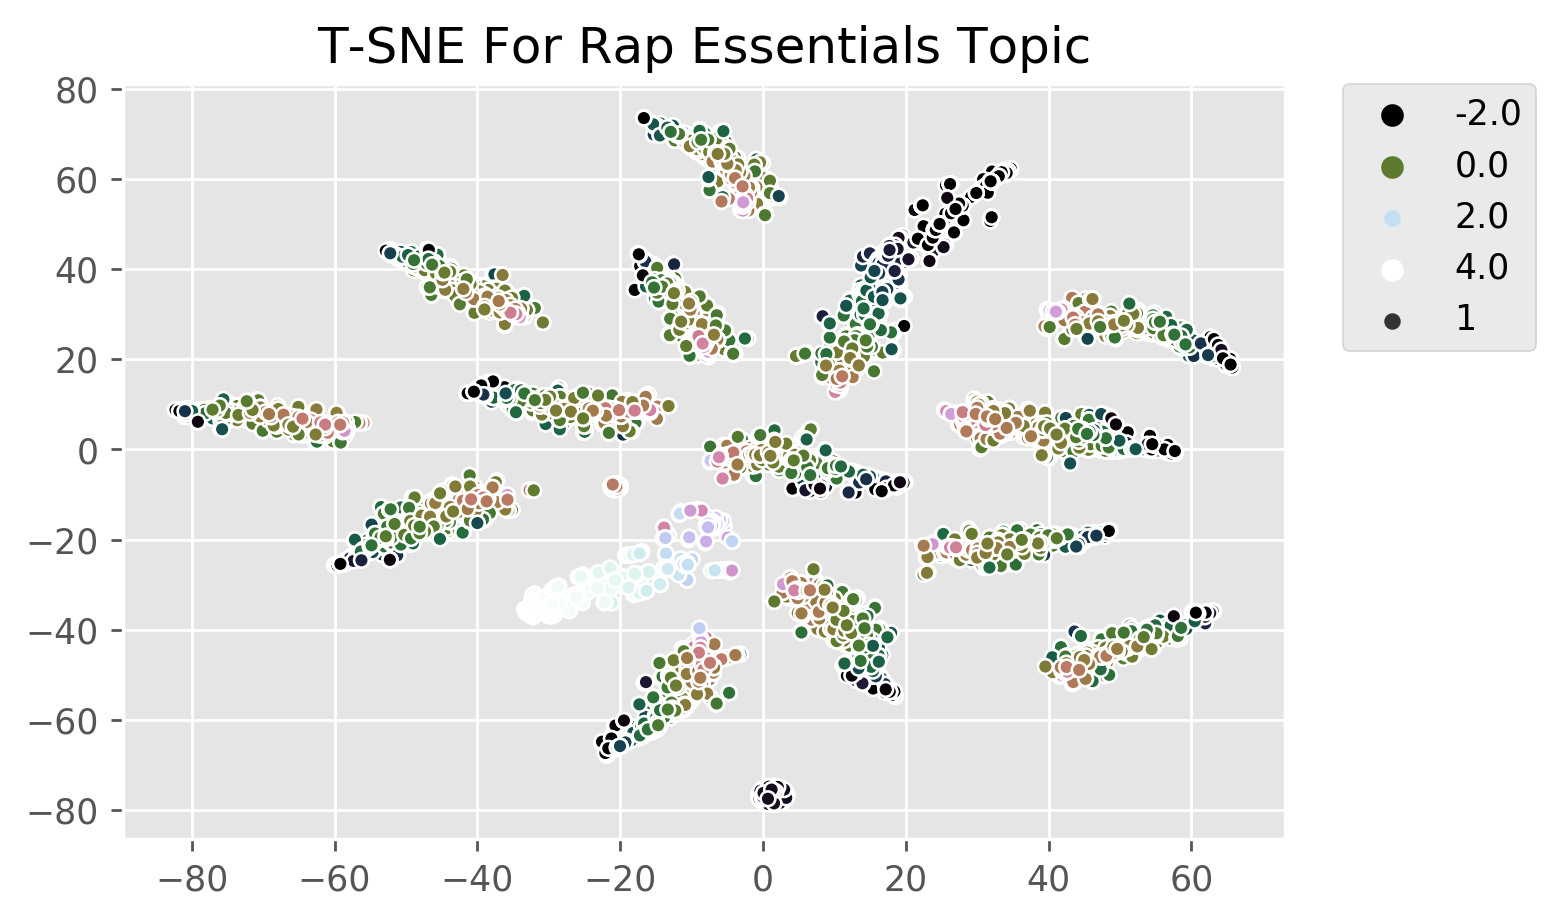

In [24]:
plt.figure(dpi=250)
plt.title("T-SNE For Rap Essentials Topic")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], lda_cv_data[:, 8],
               size = 2, palette = 'cubehelix', alpha = 'auto',
              markers = '.', legend="brief");

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#plt.savefig('/Users/brendenrossin/github/Project_Fletcher/rap_essentials.png', format='png', dpi=1000, bbox_inches="tight")

In [25]:
labels = np.asarray(ypred)

In [26]:
labels[:5]

array([3, 6, 6, 1, 6], dtype=int32)

In [27]:
df['labels'] = labels

In [28]:
df.head()

song_owner       song_title  \
0  Childish Gambino  This Is America   
1  Childish Gambino  This Is America   
2  Childish Gambino  This Is America   
3  Childish Gambino  This Is America   
4  Childish Gambino  This Is America   

                                        song_element  \
0            [Bridge: Childish Gambino & Young Thug]   
1                         [Chorus: Childish Gambino]   
2  [Verse 1: Childish Gambino, Blocboy JB, Slim J...   
3                [Refrain: Choir & Childish Gambino]   
4  [Chorus: Childish Gambino, Slim Jxmmi & Young ...   

                                               verse            artist  \
0  We just wanna party, Party just for you, We ju...  Childish Gambino   
1  This is America, Don't catch you slippin' now,...  Childish Gambino   
2  This is America (skrrt, skrrt, woo), Don't cat...  Childish Gambino   
3  Ooh-ooh-ooh-ooh-ooh, tell somebody, You go tel...  Childish Gambino   
4  This is America (woo, ayy), Don't catch you sl...  Childish Gambino   

                                         verse_words  \
0  [We, just, wan, na, party, ,, Party, just, for...   
1  [This, is, America, ,, Do, n't, catch, you, sl...   
2  [This, is, America, (, skrrt, ,, skrrt, ,, woo...   
3  [Ooh-ooh-ooh-ooh-ooh, ,, tell, somebody, ,, Yo...   
4  [This, is, America, (, woo, ,, ayy, ), ,, Do, ...   

                                          verse_stem  \
0  We just wan na parti , parti just for you , We...   
1  thi is america , Do n't catch you slippin ' no...   
2  thi is america ( skrrt , skrrt , woo ) , Do n'...   
3  ooh-ooh-ooh-ooh-ooh , tell somebodi , you go t...   
4  thi is america ( woo , ayi ) , Do n't catch yo...   

                                           verse_lem  rapper  labels  
0  We just wan na party , Party just for you , We...       1       3  
1  This be America , Do n't catch you slippin ' n...       1       6  
2  This be America ( skrrt , skrrt , woo ) , Do n...       1       6  
3  Ooh-ooh-ooh-ooh-ooh , tell somebody , You go t...       1       1  
4  This be America ( woo , ayy ) , Do n't catch y...       1       6

In [29]:
df.labels.value_counts()

5     798
0     659
3     461
1     441
7     424
10    394
6     389
12    373
8     355
14    351
9     340
11    334
2     331
13    329
4     325
Name: labels, dtype: int64

In [30]:
label_13 = df[df['labels'] == 13]

In [31]:
verses_13 = list(label_13.verse.values)

In [32]:
for i in verses_13[:20]:
    print(i)
    print('')

Foot on the gas, I'm just trying to pass, All the red lights, And the stop signs, I'm ready to go, Before I get to The Bay, Babe, that's a problem, Because I'm way too scared to call, And you might get me to stay, and oh

Foot on the gas, I'm just trying to pass, All the red lights, And the stop signs, I'm ready to go, But I'm really not ready, girl, That's a problem, 'Cause I'm way too scared to fall, And I know you choose to stay, and oh

Ooh girl, I wanna know, Are you ready to cry? Cause I'm no good, no good, Ooh girl, I wanna try, I'm an awful guy and I'm always away, And I'm tryin' to say, I'm a piece of shit, Believe in this, I'm tellin' you, Cause we barely knew, what we had, I'm not that bad, the fun we had, Ooh

Just hold me close, my darling, Just hold me close, my darling, Just hold me close, my darling, Just hold me close, my darling

Just hold me close, my darling, Just hold me close, my darling, Just hold me close, my darling, Just hold me close, my darling

'Cause if no

In [33]:
label_0 = df[df['labels'] == 0]

In [34]:
verses_0 = list(label_0.verse.values)

In [35]:
for i in verses_0[:20]:
    print(i)
    print('')

Different color, my passport; Instagram my stack load, Hashtag my day wear, and your girl drank my day care, And I'm born rich, life ain't fair – It's silver spoon coon, ho, Ain't nobody sicker in my Fisker, "vroom-vroom," ho, Ain't nobody—, (Fiskers don't make noise when they start up, just so you know), Top of the holy totem, R-r-r-rich forever, a million was not the quota, My father owned half the MoMA and did it with no diploma, Year off, got no rules, tripping off of them toadstools, More green than my Whole Foods and I'm too fly, Jeff Goldblum, Got a glass house in the Palisades, that AKA, White hood, white hood; O-KKK, Furniture custom, you shop at IKEA, Show Maserati, you whipping a Kia, Spending this money, it's longer than Nia, Live like a Coppola, me and Sofia, Waking up broke, man, wouldn't wanna be ya, Friends with the dopeman, help a nigga re-up, Bring a girlfriend, man, trouble when I see her, "Err-eh-err-eh", onomatopoeia, Oh, I got my cool on! (tailor-made!), I'm winni

In [36]:
## FOR EACH CLUSTER FIND THE CENTER -- PICK THE VERSE VECTORS THAT ARE CLOSEST TO THE CENTER TO FIND
## BEST REPRESENTATIVES FOR THAT CLUSTER
length = []
for i in range(len(df)):
    length.append(i)

verse_cluster = list(zip(length, ypred, lda_cv_data))

In [37]:
length[-1]

6303

In [38]:
verse_cluster[:5]

[(0, 3, array([-0.31156468, -0.4369354 , -0.29904978, -0.32699373, -0.28551129,
         -0.30179518, -0.28215374, -0.31154761, -1.47300619, -0.28662676,
         -0.2920432 ,  6.07921743, -0.28263963, -0.28660667, -0.31307858])),
 (1, 6, array([-0.30121127, -0.43106777, -0.28920361, -0.31711793, -0.27302911,
         -0.29052364, -0.26974077, -0.30131767, -1.86579091, -0.27447101,
         -0.27946664, -0.3127593 , -0.27024996, -0.27535733,  7.16234875])),
 (2, 6, array([-0.31073164, -0.4364633 , -0.29825756, -0.32619913, -0.28450697,
         -0.30088827, -0.28115499, -0.3107245 , -1.19274652, -0.28564871,
         -0.29103129, -0.32154533, -0.28164276, -0.28570155,  6.14891055])),
 (3, 1, array([-0.3104143 , -0.43628345, -0.29795577,  6.91636098, -0.28412438,
         -0.30054278, -0.28077452, -0.31041095, -1.87124457, -0.28527612,
         -0.2906458 , -0.32125246, -0.281263  , -0.28535675, -0.31192657])),
 (4, 6, array([-0.30605497, -0.43381286, -0.29381001, -0.32173819, -0.278868

In [39]:
len(verse_cluster)

6304

In [40]:
range_list = (list(range(15)))

In [41]:
range_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [42]:
cluster_centers = km.cluster_centers_

In [43]:
cluster_centers

array([[-0.23669017, -0.30347651, -0.19950836, -0.2209024 , -0.20335407,
        -0.19544561, -0.1876999 , -0.1793788 ,  1.8138248 , -0.19775694,
        -0.21703285, -0.23576724, -0.19324523, -0.22121199, -0.19360861],
       [-0.25076748, -0.35807551, -0.25886028,  3.42871287, -0.24340278,
        -0.24246038, -0.23302069, -0.21619726, -0.15032657, -0.24754054,
        -0.21171646, -0.28185104, -0.24017933, -0.24753055, -0.22956743],
       [-0.26593054, -0.35068963, -0.25412849, -0.27654473, -0.2194252 ,
        -0.25100584, -0.24330171, -0.25449412,  0.10045487, -0.25909189,
         4.06393096, -0.27399447, -0.24375444, -0.22520627, -0.27200025],
       [-0.2639142 , -0.2940669 , -0.26305619, -0.27993595, -0.24920522,
        -0.26023493, -0.21804935, -0.25930677, -0.14010339, -0.24428558,
        -0.25586747,  3.30159315, -0.22857066, -0.26109468, -0.24853973],
       [-0.26455287, -0.33014553, -0.26288973, -0.25898044, -0.23893851,
        -0.26161891,  4.05923284, -0.23896986, 

In [44]:
cluster_centers = list(zip(range_list,cluster_centers))

In [45]:
cluster_centers

[(0, array([-0.23669017, -0.30347651, -0.19950836, -0.2209024 , -0.20335407,
         -0.19544561, -0.1876999 , -0.1793788 ,  1.8138248 , -0.19775694,
         -0.21703285, -0.23576724, -0.19324523, -0.22121199, -0.19360861])),
 (1, array([-0.25076748, -0.35807551, -0.25886028,  3.42871287, -0.24340278,
         -0.24246038, -0.23302069, -0.21619726, -0.15032657, -0.24754054,
         -0.21171646, -0.28185104, -0.24017933, -0.24753055, -0.22956743])),
 (2, array([-0.26593054, -0.35068963, -0.25412849, -0.27654473, -0.2194252 ,
         -0.25100584, -0.24330171, -0.25449412,  0.10045487, -0.25909189,
          4.06393096, -0.27399447, -0.24375444, -0.22520627, -0.27200025])),
 (3, array([-0.2639142 , -0.2940669 , -0.26305619, -0.27993595, -0.24920522,
         -0.26023493, -0.21804935, -0.25930677, -0.14010339, -0.24428558,
         -0.25586747,  3.30159315, -0.22857066, -0.26109468, -0.24853973])),
 (4, array([-0.26455287, -0.33014553, -0.26288973, -0.25898044, -0.23893851,
         -0

In [46]:
def data_to_cluster(data, cluster):
    return [i for i in data if i[1] == cluster]

In [47]:
verse_0 = [i for i in verse_cluster if i[1] == 0]

verse_0[:5]

[(22,
  0,
  array([-0.31698789, -0.44000894, -0.19167947, -0.33216678, -0.29204957,
         -0.30769932, -0.28865577, -0.31690615,  2.61242872, -0.29299406,
         -0.29863092, -0.32731901, -0.28912946, -0.29249919, -0.31850951])),
 (26,
  0,
  array([-0.30121128, -0.43106777, -0.28920361, -0.31711793, -0.27302911,
         -0.29052364, -0.26974077, -0.30131767,  2.55165966, -0.27447101,
         -0.27946664, -0.3127593 , -0.27024996, -0.27535733, -0.30271045])),
 (28,
  0,
  array([-0.30121128, -0.43106777, -0.28920361, -0.31711793, -0.27302911,
         -0.29052364, -0.26974077, -0.30131767,  2.55165966, -0.27447101,
         -0.27946664, -0.3127593 , -0.27024996, -0.27535733, -0.30271045])),
 (29,
  0,
  array([-0.31571301, -0.43928642, -0.30299488, -0.33095071, -0.29051256,
         -0.30631138, -0.28712728, -0.31564648,  2.67197032, -0.29149725,
         -0.29708229, -0.32614247, -0.28760385, -0.29111399, -0.31723282])),
 (30,
  0,
  array([-0.30121128, -0.43106777, -0.2892036

In [48]:
verse_0 = data_to_cluster(verse_cluster, 0)
verse_1 = data_to_cluster(verse_cluster, 1)
verse_2 = data_to_cluster(verse_cluster, 2)
verse_3 = data_to_cluster(verse_cluster, 3)
verse_4 = data_to_cluster(verse_cluster, 4)
verse_5 = data_to_cluster(verse_cluster, 5)
verse_6 = data_to_cluster(verse_cluster, 6)
verse_7 = data_to_cluster(verse_cluster, 7)
verse_8 = data_to_cluster(verse_cluster, 8)
verse_9 = data_to_cluster(verse_cluster, 9)
verse_10 = data_to_cluster(verse_cluster, 10)
verse_11 = data_to_cluster(verse_cluster, 11)
verse_12 = data_to_cluster(verse_cluster, 12)
verse_13 = data_to_cluster(verse_cluster, 13)
verse_14 = data_to_cluster(verse_cluster, 14)

In [49]:
verse_0[:10]

[(22,
  0,
  array([-0.31698789, -0.44000894, -0.19167947, -0.33216678, -0.29204957,
         -0.30769932, -0.28865577, -0.31690615,  2.61242872, -0.29299406,
         -0.29863092, -0.32731901, -0.28912946, -0.29249919, -0.31850951])),
 (26,
  0,
  array([-0.30121128, -0.43106777, -0.28920361, -0.31711793, -0.27302911,
         -0.29052364, -0.26974077, -0.30131767,  2.55165966, -0.27447101,
         -0.27946664, -0.3127593 , -0.27024996, -0.27535733, -0.30271045])),
 (28,
  0,
  array([-0.30121128, -0.43106777, -0.28920361, -0.31711793, -0.27302911,
         -0.29052364, -0.26974077, -0.30131767,  2.55165966, -0.27447101,
         -0.27946664, -0.3127593 , -0.27024996, -0.27535733, -0.30271045])),
 (29,
  0,
  array([-0.31571301, -0.43928642, -0.30299488, -0.33095071, -0.29051256,
         -0.30631138, -0.28712728, -0.31564648,  2.67197032, -0.29149725,
         -0.29708229, -0.32614247, -0.28760385, -0.29111399, -0.31723282])),
 (30,
  0,
  array([-0.30121128, -0.43106777, -0.2892036

In [50]:
def find_cluster_closest_verses(verse_cluster, cluster_centers, cluster):
    cluster_center = cluster_centers[cluster][1]
    distances=[]
    for index, cluster, vector in verse_cluster:
        dist=np.linalg.norm(vector-cluster_center)
        distances.append((index,dist))
    distances = sorted(distances, key=lambda x: x[1])
    verses = []
    artist = []
    for i in distances[:10]:
        verses.append(df.verse.iloc[i[0]])
    for i in distances[:10]:
        artist.append(df.artist.iloc[i[0]])
    first_10_distances = distances[:10]
    
    results = list(zip(artist, verses))
    
    return first_10_distances, results

In [51]:
find_cluster_closest_verses(verse_0, cluster_centers, 0)

([(310, 0.2183623635358039),
  (5745, 0.2183624171012649),
  (5299, 0.2183624501502338),
  (5301, 0.2183624501502338),
  (5303, 0.2183624501502338),
  (4710, 0.21836245100769633),
  (4266, 0.21836245951046954),
  (5221, 0.2183624622105378),
  (1360, 0.21836250026885382),
  (2686, 0.21836250026885382)],
 [('Childish Gambino',
   "If you cannot, oh!, There is more to you and me, There is more than they can see, I'm on your side, woo, oh, There is more out there, And somebody cares 'bout you, I do"),
  ('Kanye West', 'But you ain’t hearing what I am saying'),
  ('Kanye West',
   'Let me hear you say, Yeah, yeah, yeah, Yeah, yeah, yeah, Yeah, yeah, yeah, Okay, okay'),
  ('Kanye West',
   'Let me hear you say, Yeah, yeah, yeah, Yeah, yeah, yeah, Yeah, yeah, yeah, Okay, okay'),
  ('Kanye West',
   'Let me hear you say, Yeah, yeah, yeah, Yeah, yeah, yeah, Yeah, yeah, yeah, Okay, okay'),
  ('Kanye West', 'Right now, I need right now'),
  ('Kendrick Lamar', "But you ain't hear what he said."),


In [52]:
cluster_zero_verses = find_cluster_closest_verses(verse_0, cluster_centers, 0)

cluster_zero_verses

([(310, 0.2183623635358039),
  (5745, 0.2183624171012649),
  (5299, 0.2183624501502338),
  (5301, 0.2183624501502338),
  (5303, 0.2183624501502338),
  (4710, 0.21836245100769633),
  (4266, 0.21836245951046954),
  (5221, 0.2183624622105378),
  (1360, 0.21836250026885382),
  (2686, 0.21836250026885382)],
 [('Childish Gambino',
   "If you cannot, oh!, There is more to you and me, There is more than they can see, I'm on your side, woo, oh, There is more out there, And somebody cares 'bout you, I do"),
  ('Kanye West', 'But you ain’t hearing what I am saying'),
  ('Kanye West',
   'Let me hear you say, Yeah, yeah, yeah, Yeah, yeah, yeah, Yeah, yeah, yeah, Okay, okay'),
  ('Kanye West',
   'Let me hear you say, Yeah, yeah, yeah, Yeah, yeah, yeah, Yeah, yeah, yeah, Okay, okay'),
  ('Kanye West',
   'Let me hear you say, Yeah, yeah, yeah, Yeah, yeah, yeah, Yeah, yeah, yeah, Okay, okay'),
  ('Kanye West', 'Right now, I need right now'),
  ('Kendrick Lamar', "But you ain't hear what he said."),


In [53]:
cluster_1_verses = find_cluster_closest_verses(verse_1, cluster_centers, 1)

cluster_1_verses

([(1946, 0.1972827645124377),
  (2860, 0.1972827645124377),
  (4903, 0.22959227845840277),
  (6272, 0.24795355045634426),
  (5939, 0.257697153566945),
  (4416, 0.2704171746083667),
  (5145, 0.2704171746083667),
  (3585, 0.2864334291958811),
  (1931, 0.2910366337020476),
  (2845, 0.2910366337020476)],
 [('Kanye West', "Watch out for me, I'm bound to glow"),
  ('Kanye West', "Watch out for me, I'm bound to glow"),
  ('Kanye West',
   '("You\'ve got mail!") N-n-n-n-n-now who the hell is this, E-mailing me at 11:26?, Telling me that she 36-26, plus double-d, You know how girls on Black Planet be when they get bubbly, At NYU but she hail from Kansas, Right now she just lamping, chilling on campus, Sent me a picture of her feelin\' on Candice, Who said her favorite rapper was the late great Francis, W-H-I-T-E, it\'s getting late mami, Your screen saver say tweet, so you got to "call me", And bring a friend for my friend, his name Kweli, (You mean Talib? Lyrics sticks to your rib), I mean (Th

In [54]:
cluster_2_verses = find_cluster_closest_verses(verse_2, cluster_centers, 2)

cluster_2_verses

([(5514, 0.12014709736170215),
  (4872, 0.1434024436624348),
  (2054, 0.2020612286173171),
  (4694, 0.23414241424218296),
  (6116, 0.23834498889789038),
  (4883, 0.2383449905789335),
  (4479, 0.2595520901268176),
  (2326, 0.26452739365873507),
  (3576, 0.278311312249618),
  (4035, 0.28476708110826265)],
 [('Kanye West',
   'Where were you when you were writing those tweets. I like to imagine, on the toilet.'),
  ('Kanye West',
   "Oh yeah..., I've got the perfect song for the kids to sing..."),
  ('Drake',
   "Shallow nigga but deep enough to have gone swimming, I think I'm spending all my time with the wrong women, I think I'll have a chance at love and knowing me I'll miss it, Cause me dedicating my time just isn't realistic, Man, the good girls went silent on me, They got a boyfriend, or left for college on me, And all the bad ones I used to hit are friends now, That make me wish I had a little less mileage on me, But do I ever come up in discussion, Over double pump lattes and low 

In [55]:
cluster_3_verses = find_cluster_closest_verses(verse_3, cluster_centers, 3)

cluster_3_verses

([(2399, 0.20033464310229396),
  (5981, 0.23083794346872089),
  (6204, 0.23643943956521807),
  (5931, 0.2364395222227512),
  (4633, 0.2576350037470477),
  (4925, 0.29887682880614),
  (3214, 0.3016196570986528),
  (2368, 0.30888793982345086),
  (2492, 0.3253798537251186),
  (3902, 0.32588698737389227)],
 [('Drake',
   'My generation is changin, Aside from the fact, The dealers have customers they provide with the crack, Front of the buses taken, And we deny it from the back, You can die where you from, or die where you at'),
  ('Kanye West',
   'Mase said come on, Mike said shamone, Let\'s start it up early like Raven Symone, Keisha Knight Pull, Emanuel, I dropped out of school with no manual, Nothing handed at all, but did I complain, Every time magazines tried to taint mine name, But y\'all can\'t hold me down like restraint, I took the "t" up out the word can\'t, Around the same time Nas said I can, Bush was sending our fam to Iran, I\'m in the club with Henny, ass in my other hand, 

In [56]:
cluster_4_verses = find_cluster_closest_verses(verse_4, cluster_centers, 4)

cluster_4_verses

([(4245, 0.25322658809882165),
  (4867, 0.2668636176304921),
  (3650, 0.2786011631580715),
  (3652, 0.2786011631580715),
  (3654, 0.2786011631580715),
  (1828, 0.288878043271966),
  (5421, 0.29069169056026584),
  (6261, 0.2912943282644559),
  (6096, 0.29358190134023715),
  (6188, 0.29480040249683614)],
 [('Kendrick Lamar',
   'K-Dot, Kendrick Lamar, got mad heart, Come from Compton, I spit straight heart, Got my hood on for Trayvon Martin, Freedom, justice, you know we gon\' be started, Get the party started every time we come through flippin\', Flamin\' Hot Cheetos I\'m eatin\', I\'m skippin\' across L.A., that\'s somethin\' that we do, Each and every day, hangin\' with my crew, Throw another word, watch how I observe the train, Matter of face, where\'s my girl, Sherane, And when I say "train", that don\'t means that I flip her, Yeah, we did toss, turn just like Flipper, My favorite cartoon, you know, Got to go with Bugs Bunny Cartoon Show, Tiny Toon Adventures, Dennis the Menace, I\'

In [57]:
cluster_5_verses = find_cluster_closest_verses(verse_5, cluster_centers, 5)

cluster_5_verses

([(5971, 0.21195930888132888),
  (5973, 0.21195930888132888),
  (5461, 0.21904214825203147),
  (1163, 0.36501159959068624),
  (762, 0.4198818396191819),
  (367, 0.44886827377113736),
  (370, 0.44886827377113736),
  (5819, 0.458412233324988),
  (5780, 0.4876981325265792),
  (1517, 0.494999303164301)],
 [('Kanye West', 'Message skipped. Next message'),
  ('Kanye West', 'Message skipped. Next message'),
  ('Kanye West',
   'No one wants to fall out of heaven, Uh uh uh uh uh uh uh, Uh uhh, Uh uh uh uh uh uh uh'),
  ('Chance the Rapper',
   "And I'm still standing here, Standing still, I won't be moved, How used to do when"),
  ('Childish Gambino', "Every time I see you girl, you're so far away"),
  ('Childish Gambino',
   "With a gun in your hand, I'm the boogieman, I'm gonna come and get you"),
  ('Childish Gambino',
   "With a gun in your hand, I'm the boogieman, I'm gonna come and get you"),
  ('Kanye West', 'In a bad way, a bad way and I’m not getting paid for it'),
  ('Kanye West',
  

In [58]:
cluster_6_verses = find_cluster_closest_verses(verse_6, cluster_centers, 6)

cluster_6_verses

([(5854, 0.13506286288254873),
  (2999, 0.20696748171507848),
  (3003, 0.20696748171507848),
  (5921, 0.20864150194169961),
  (1921, 0.256755317788031),
  (5507, 0.28769656020972334),
  (5964, 0.29212317323643333),
  (7, 0.30420568868202313),
  (782, 0.30420568868202313),
  (6093, 0.30490361156120716)],
 [('Kanye West', 'So upset, This that hot shit, Uh huh, yeah, New Monica!'),
  ('Kendrick Lamar',
   "I said I'm geeked and I'm fired up (fired, fire), All I want tonight is just to get high up (yeah), All I want is, all I want is"),
  ('Kendrick Lamar',
   "I said I'm geeked and I'm fired up (fired, fire), All I want tonight is just to get high up (yeah), All I want is, all I want is"),
  ('Kanye West',
   "I started from my mama, now I'm here. I started with when my mama was educating me since..."),
  ('Drake',
   "People change, I'm not surprised, Devil's working overtime, Voodoo spells put on my life, It won't work, they all have tried"),
  ('Kanye West',
   'Back when Eve went with

In [59]:
cluster_7_verses = find_cluster_closest_verses(verse_7, cluster_centers, 7)

cluster_7_verses

([(4477, 0.14212120845084453),
  (3052, 0.17569449018764047),
  (6181, 0.2016081192017134),
  (56, 0.21592335323511577),
  (6237, 0.21617603534906565),
  (3424, 0.22919171726379808),
  (5296, 0.2601753437005718),
  (3140, 0.2641513172484837),
  (4088, 0.2654304731652754),
  (3250, 0.2682143311058256)],
 [('Kanye West',
   "All them other niggas lame, and you know it now, When a real nigga hold you down, you s'posed to drown"),
  ('Kendrick Lamar', "Let's get it!, Look, look!, On foenem"),
  ('Kanye West',
   "Number one, so together I'm eleven, She's a ten, I'm number one, together we eleven, Her friend only a seven, sent her to 7-Eleven, She a ten, she a seven, that make 'em seventeen, Let me see your ID, only seventeen?, Eesh, that could have fucked up everythin', Nike, already don't like me, always on a white tee, Dressed like I'm hypebeast, signed through my white tee, Dont race against the American dream, Together we like the Kenyan marathon team, Three black rap acts that spit th

In [60]:
cluster_8_verses = find_cluster_closest_verses(verse_8, cluster_centers, 8)

cluster_8_verses

([(1196, 0.15350553520495838),
  (6255, 0.15831830877411993),
  (2621, 0.20445580295118987),
  (5783, 0.26794071897028315),
  (1618, 0.26794117060442346),
  (3978, 0.3061230696795358),
  (2598, 0.30723248959931404),
  (6110, 0.30797983737744056),
  (4459, 0.31229227428547535),
  (5211, 0.31229227428547535)],
 [('Chance the Rapper',
   'Split up them twins, we gone all the time, I see them everyday that I can rhyme'),
  ('Kanye West',
   "No, you can't. You need the infrastructure. It's not a matter of just having money."),
  ('Drake', "T. Slack, I promise I got 'em, homie!"),
  ('Kanye West', 'Yeah, they broke Vanellope’s car!'),
  ('Drake',
   "It's a little chilly out there, How you can stand there is beyond me"),
  ('Kendrick Lamar',
   'Wouldn\'t you know, We been hurt, down before, When our pride was low, Lookin\' at the world, "Where do we go?", I\'m at the preacher\'s door, They wanna kill us dead, at the preacher\'s door, We said give \'em some more, This one time, do it fo\' s

In [61]:
cluster_9_verses = find_cluster_closest_verses(verse_9, cluster_centers, 9)

cluster_9_verses

([(1766, 0.21836014019012548),
  (3766, 0.23469074046870214),
  (5450, 0.2514143634504447),
  (4718, 0.2708936030481583),
  (5115, 0.27649759982527805),
  (3343, 0.28952960662605065),
  (5593, 0.2920105204387909),
  (3295, 0.3007656028943631),
  (5864, 0.3041343995284525),
  (1814, 0.3058500557980458)],
 [('Drake',
   'Never thought I\'d be talkin\' from this perspective, But, I\'m not really sure what else you expected, When the higher-ups have all come together as a collective, With conspiracies to end my run and send me a message, 40, did you get the message?, \'Cause I just checked my phone and I didn\'t get it, I mean, I say hats off for a solid effort, But we didn\'t flinch for a second, we got our shit together, Yeah, not here to fight wars, But niggas wanna talk high scores, PARTY just dipped off in a white Porsche, And I just came from dinner where I ate some well-done seared scallops that were to die for, But, I got bigger fish to fry, I\'m talkin\' bigger shit than you and I

In [62]:
cluster_10_verses = find_cluster_closest_verses(verse_10, cluster_centers, 10)

cluster_10_verses

([(3454, 0.22786015824427105),
  (5003, 0.28312006567275505),
  (3796, 0.2875060600269398),
  (4198, 0.2917233556114683),
  (1151, 0.3053332491882593),
  (3001, 0.31601796055996173),
  (5811, 0.316849616838435),
  (5264, 0.33882009833877347),
  (1574, 0.3394027985419029),
  (5719, 0.34195561707471767)],
 [('Kendrick Lamar', 'Pimp pimp (hooray!)'),
  ('Kanye West',
   "In the streets, In the streets, I'm just not there in the streets, I'm just not there, Life's just not fair, Life's just not fair"),
  ('Kendrick Lamar',
   "In due time I'm the modern day Albert Einstein, I'm prime time like Deion, And the rest of y'all is peons, I pee on the best, Whoever you are you can step, Like a prosthetic leg, I see monsters in my head, That's why I rap with such aggression, I tear down studio sessions, Rappers scared, they walk in the booth, With a bible and a reverend, I use my mouth as a weapon, Bullets rip through your mid section, Rat tat a tat tat tat rata tat tat tat, I'm a Comptown, nigga 

In [63]:
cluster_11_verses = find_cluster_closest_verses(verse_11, cluster_centers, 11)

cluster_11_verses

([(2429, 0.13296571193358267),
  (4302, 0.19306453952397332),
  (3630, 0.19867338718274685),
  (3162, 0.24735304810205125),
  (4629, 0.24907547160662563),
  (5961, 0.24907547160662563),
  (6167, 0.2628010399027013),
  (1137, 0.30477465439806956),
  (2698, 0.30478818862134377),
  (3368, 0.30519410290305476)],
 [('Drake', "Yeah. Ho!, It's Drake. Uh Uh. Ho!, Do that dance. Do that Dance"),
  ('Kendrick Lamar',
   'I don\'t need the hype, They call me- fuck it- I don\'t need no introduction, No ad-libing my name 100 times for nothing, You already know it\'s K. Dot, city of Compton, Analogy is like Biggie and Bed Stuy, Oakland and 2Pac, I\'m more focused, I\'m nothing like you new guys, Struggling over a few lines thinking you hot, Cause your homey said you you was a few times, Which is too many times, They lying to you, they telling a lie, The only time I lie in the booth is when I sleep in it, Record 24 hrs, you niggas better get your bars up, I bench press this rap stuff, got it locked l

In [64]:
cluster_12_verses = find_cluster_closest_verses(verse_12, cluster_centers, 12)

cluster_12_verses

([(5820, 0.24495098576900798),
  (6241, 0.2596590620663442),
  (5860, 0.2657241586690449),
  (5153, 0.28685438167182425),
  (5156, 0.28685438167182425),
  (5158, 0.28685438167182425),
  (4534, 0.292721893561097),
  (4861, 0.29331488561554697),
  (3784, 0.29333552498591403),
  (6078, 0.31073032848076015)],
 [('Kanye West',
   'So it’s like the dopeness which makes the money, I want the dopeness and the money'),
  ('Kanye West',
   'You could mix into that cause I basically gave a lotta my side on that'),
  ('Kanye West',
   "And I can't keep knockin' and keep rockin', Let's get it poppin' and that's stoppin'"),
  ('Kanye West',
   'Here we go, like we should, Feel the sweat, on your face, Here we go, like we should, Feel the sweat, on your face, Alright, okay, Here we go, like we should, Like we should, like we should, Like we should'),
  ('Kanye West',
   'Here we go, like we should, Feel the sweat, on your face, Here we go, like we should, Feel the sweat, on your face, Alright, okay, 

In [65]:
cluster_13_verses = find_cluster_closest_verses(verse_13, cluster_centers, 13)

cluster_13_verses

([(6226, 0.2502974716215682),
  (6280, 0.2502974716215682),
  (3362, 0.2739131604369605),
  (2669, 0.2874285661924393),
  (4102, 0.29455030821546),
  (5267, 0.30420731131618534),
  (1422, 0.3188451762906919),
  (2052, 0.31932409830277125),
  (6129, 0.3235079270769092),
  (6212, 0.3380061492523505)],
 [('Kanye West',
   'Throw... (red) Your... (white), Hands... (blue) Up... (black)'),
  ('Kanye West',
   'Throw... (red) Your... (white), Hands... (blue) Up... (black)'),
  ('Kendrick Lamar',
   'Lord forgive me... kill him where he stand and stand over him, Shake his hand then jump back in that mini van, Double back to his block and blam I ain\'t backing down for nothing, I\'mma back \'em down like Shaq with this black 2-2-3 in my hand, Better pray that this chopper jam like a radio single, man, Police radio signals saying that a 187 land, On your corner, coroners comfort your momma, "Momma he\'s dead" the next morning, I toasted up with my homies, We drink and smoke marijuana, want us to

In [66]:
cluster_14_verses = find_cluster_closest_verses(verse_14, cluster_centers, 14)

cluster_14_verses

([(212, 0.21701295727774128),
  (5588, 0.21721545174543566),
  (5840, 0.24285486995578098),
  (5847, 0.24871191395949308),
  (1604, 0.2539941725219305),
  (3898, 0.26802870690320985),
  (6119, 0.28918446614048554),
  (6121, 0.28918446614048554),
  (4286, 0.30158609957901994),
  (5992, 0.3043742234344488)],
 [('Childish Gambino',
   'Buddha stance in a forest on the ayahuasca, I\'m as high as copters, binoculars, Looking down on my confidence, Truly honest man, I wish there was more of us freaking out, I wet the bed the first night on my tour bus, God damn, what\'re you doing man?, I can\'t name a lot of rappers that you better than, He hates women and himself, I won\'t give him the chance, Tear myself down first to make \'em pay in advance, Heard a lot of y\'all talking behind his back, When he walking out, Me and Fam in the corner, what are they talking \'bout?, The same dudes who laughing after you go, Be the same dudes emailing asking you \'bout your show, It\'s on FX? Tight nigga, 

In [67]:
from scipy.spatial.distance import cdist

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / np.sqrt(np.dot(vec1, vec1) * np.dot(vec2, vec2))

def find_cluster_closest_cosine_verses(verse_cluster, cluster_centers, cluster):
    cluster_center = cluster_centers[cluster][1]
    distances=[]
    for index, cluster, vector in verse_cluster:
        dist = cosine_similarity(cluster_center,vector)
        distances.append((index,dist))
    distances = sorted(distances, key=lambda x: x[1], reverse=True)
    verses = []
    artist = []
    for i in distances[:10]:
        verses.append(df.verse.iloc[i[0]])
    for i in distances[:10]:
        artist.append(df.artist.iloc[i[0]])
    first_10_distances = distances[:10]
    
    results = list(zip(artist, verses))
    
    return first_10_distances, results


#val_out = 1 - cdist(cluster_center, vector, 'cosine')

### TOPIC 0 (cluster 7): brain cells??

let, gon, wake, fall, kendrick, brain, let let, cells, brain cells, best best, stand, burn, lamar, kendrick lamar, weather

### TOPIC 1 (cluster 5): LOVE

love, feel, say, good, way, make, better, love love, hold, leave, time, say say, come, ve, ll

### TOPIC 2 (cluster 10): GOD/(LIQUOR+MUSIC+CAMERA)

need, god, need need, new, highlight, god god, brand, brand new, watch, swear, music, swear god, camera, pool liquor, blue

### TOPIC 3 (cluster 1): black man/aggressive?

man, black, kanye, south, money, west, kanye west, black man, yea, shut, somebody, man man, type, sayin, wack

### TOPIC 4 (cluster 11): friends/forever.

friends friends, ho, forever forever, zoom, weave, ho ho, zoom zoom, ta lie, planet, scratch, sunshine, west, throw diamonds, dream, wrong things

### TOPIC 5 (cluster 12): movement

alright, cam, cam cam, light, shoot, motion, stand, drive slow, light light, slow homie, jesus walk, ca study, roll, flame, suit

### TOPIC 6 (cluster 4): smoking/women

hol, juke, juke juke, hol hol, smoke, beyonce, controlla, compton, emotional, spin, break break, make right, controlla controlla, butter, lil bitch

### TOPIC 7 (cluster 14): music/rap

jam, boy, bout, problem, rap, dj, cause, compton, blow, yah, ai, boo, level, low, blow blow

### TOPIC 8 (cluster 0/all): very generic

say, tell, ai, make, cause, time, right, man, wan, bitch, ca, come, ll, look, think

### TOPIC 9 (cluster 9): talking/sky/crash

bout, aye, continue, talm, team, talm bout, th, bout talm, touch sky, bitch ass, ooooh continue, levitate, crash, mhm, dice

### TOPIC 10 (cluster 2): fun/summer/birthday/laugh

ring ring, summer, finna, yo, prolly, say time, better love, birthday, influence, june, conflict, laugh, ll prolly, click, cake

### TOPIC 11 (cluster 3): girls/derogatory

baby, girl, started, amaze, extra, kill vibe, team, bitch kill, lord, amaze amaze, party, forgive, money, wee, kill

### TOPIC 12 (cluster 13): gangstas

bom, fu, bom bom, chain heavy, gangstas, red, heavy chain, dna, debt, people love, amen, close, fu fu, simmer, create

### TOPIC 13 (cluster 8): relax

yeezy, gon alright, relax ll, question, yeezy yeezy, ll whack, impossible, igh, everyday, dive, whack relax, bounce, nori, igh igh, wonderful

### TOPIC 14 (cluster 6): cops/america

high, wo, livin, away, woah, complicate, police, wo high, america, catch, movie, whoop, blah, cool, mark

topic 0 --> cluster 7

topic 1 --> cluster 5

topic 2 --> cluster 10

topic 3 --> cluster 1

topic 4 --> cluster 11

topic 5 --> cluster 12

topic 6 --> cluster 4

topic 7 --> cluster 14

topic 8 --> cluster 0

topic 9 --> cluster 9

topic 10 --> cluster 2

topic 11 --> cluster 3

topic 12 --> cluster 13

topic 13 --> cluster 8

topic 14 --> cluster 6

### REAL TOPIC 8 (cluster 0/all): very generic == The "rap essentials" cluster ??

say, tell, ai, make, cause, time, right, man, wan, bitch, ca, come, ll, look, think

In [68]:
cluster_0_top_ten = find_cluster_closest_cosine_verses(verse_0, cluster_centers, 0)

cluster_0_top_ten

([(500, 0.9997833511194493),
  (515, 0.999705202992563),
  (424, 0.9996173350442465),
  (211, 0.9996173272571109),
  (324, 0.9996155925459641),
  (332, 0.9995936781157962),
  (506, 0.9995711060455386),
  (316, 0.999553191116465),
  (539, 0.9995531898997448),
  (452, 0.999553185995447)],
 [('Childish Gambino',
   'Childish Gambino, yeah, my voice is annoying, So I don\'t talk, I let the streets talk for me, Yeah, these girls crazy, half got children, I hate their ex-boyfriends, call \'em Scott Pilgrim, I\'m fucking girls I really shouldn\'t be fucking with, But if we get caught, we just hand it off to our publicists, Plus, I hang with some of their ex boyfriends, What can I say? I make bad choices, Culdesac dropped, day one, five figures, Fish fry, nigga, fry mine bigger, Still unsigned, fans saying "What\'s the hold out, When every show you\'ve ever done\'s been sold out?", I always wondered what this hollywood would do to me, "Who\'s that rapping—Yo, it\'s Troy from Community!", "Fuck

### REAL TOPIC 3 (cluster 1): black man/aggressive == The "origin story" cluster

man, black, kanye, south, money, west, kanye west, black man, yea, shut, somebody, man man, type, sayin, wack

In [69]:
cluster_1_top_ten = find_cluster_closest_cosine_verses(verse_1, cluster_centers, 1)

cluster_1_top_ten

([(1026, 0.999838410265368),
  (2421, 0.9997959626127328),
  (3584, 0.9997874117286053),
  (1447, 0.9997868257120268),
  (1450, 0.9997868257120268),
  (1453, 0.9997868257120268),
  (4420, 0.999745865685328),
  (4423, 0.999745865685328),
  (5402, 0.999745865685328),
  (5405, 0.999745865685328)],
 [('Chance the Rapper',
   "And now you know Noname ain't never for none, (Ayo, you know Chano ain't never for none), And now you know Noname ain't never for none, (Ayo, you know Chano ain't never for none), Aha, and you don't stop, Boom bap, and you don't stop, I told you that was gonna be fun though"),
  ('Drake',
   "Yeah, Ren, M.O.F, Haha, It's Drake man, it's Drake man.Yeah, Ayo Ren this that gritty shit here man, I'ma have to tell them about I been through on this know what I mean, HO! Southern Smoke!!!"),
  ('Kendrick Lamar',
   'Show of hands, how many been taking notes? Good. Leave everything on the table now. Vulnerability, this is your generation. Show, show your pain'),
  ('Drake',
 

### REAL TOPIC 10 (cluster 2): fun/summer/birthday/laugh == The "Amused cause I'm better" cluster ??

ring ring, summer, finna, yo, prolly, say time, better love, birthday, influence, june, conflict, laugh, ll prolly, click, cake

In [70]:
cluster_2_top_ten = find_cluster_closest_cosine_verses(verse_2, cluster_centers, 2)

cluster_2_top_ten

([(618, 0.9999531613417024),
  (1455, 0.9999300147735598),
  (1001, 0.9999182746676133),
  (3509, 0.9998840432324749),
  (1077, 0.9998584341826837),
  (3506, 0.9998427910633831),
  (5514, 0.9997982835010754),
  (3057, 0.9997544585860386),
  (3074, 0.9997456517466435),
  (2619, 0.9997382555047397)],
 [('Childish Gambino',
   'I’m cooler than an ice cube, yeah I’m rude, ‘Bout to get your head sliced, yeah I’m nice, And you ‘bout to pay the price, Like The Price Is Right, but I’m not Bob Barker, Yes, I get down like I’m Charlie Parker, Meaning that I’m musically inclined, If you try to get with mine I’m about to blow yo head back, Get another bullet and I spray bullet (bullet), And I spray back, pop, pop, click, click (drop, drop) down, Now they lookin’ for your body like all over the town, Niggas, my name Gambini, I used to be clean, Now I’m dirty martini, ‘cause this boy met world like Feeny, These niggas make wishes like genie'),
  ('Drake',
   "That's the shit I'm talking 'bout though

### REAL TOPIC 11 (cluster 3): girls/derogatory == The "cocky asshole" cluster

baby, girl, started, amaze, extra, kill vibe, team, bitch kill, lord, amaze amaze, party, forgive, money, wee, kill

In [71]:
cluster_3_top_ten = find_cluster_closest_cosine_verses(verse_3, cluster_centers, 3)

cluster_3_top_ten

([(2322, 0.9998488122568328),
  (2323, 0.9998488122568328),
  (2927, 0.9996726663275215),
  (2930, 0.9996726663275215),
  (2933, 0.9996726663275215),
  (3165, 0.9996726663275215),
  (3167, 0.9996726663275215),
  (3716, 0.9996726663275215),
  (3719, 0.9996726663275215),
  (3797, 0.9996726663275215)],
 [('Drake',
   "I got a triple king bed and I don't mind sharing, I got a big G-Wagon, I don't mind sharing, We can get wild like Olivia, we can get stoned like Sharon, Wrote Take Care, but they push me to the point where I'm just not caring, I'm just more ready than petty nowadays, I'm just more ready than petty nowadays just know, I'm just more ready than petty nowadays, I'm just more ready than petty nowadays just know, I'm just more ready than"),
  ('Drake',
   "I got a triple king bed and I don't mind sharing, I got a big G-Wagon, I don't mind sharing, We can get wild like Olivia, we can get stoned like Sharon, Wrote Take Care, but they push me to the point where I'm just not caring, I

### TOPIC 6 (cluster 4): The "how we escaped the streets" cluster

hol, juke, juke juke, hol hol, smoke, beyonce, controlla, compton, emotional, spin, break break, make right, controlla controlla, butter, lil bitch

In [72]:
cluster_4_top_ten = find_cluster_closest_cosine_verses(verse_4, cluster_centers, 4)

cluster_4_top_ten

([(731, 0.9999524459050416),
  (1088, 0.9999258366942728),
  (2445, 0.9998486437510918),
  (1702, 0.999828799462975),
  (2903, 0.9997656694479923),
  (938, 0.999751212884115),
  (953, 0.9997111547703988),
  (1866, 0.9997022855791651),
  (1157, 0.9995940534996122),
  (4933, 0.9995633942949864)],
 [('Childish Gambino',
   "Boy I need a censor, Boy you need a mentor, These boys need to be lead, Like they're two pencils, Yes I'm a black nerd, It's that simply, Call me poindexter, Or the black Ed Grimly, Girl attitude stay stank like kimchi, But she ain't Korean and her boy ain't friendly, Turn your girls that are friends to fuck buddies, Keep em on the wire, That's why I cuddy, And every girl that I'm friends with wants to fuck, That's why she waits till I'm drunk, Then she runs amok, Guess boy my name's an aphrodisiac, Yes boy at the hotel's where I leave em at, I am Animaniac cause I'm so wacko, Better warn a brother when you see a chick act ho, And even if she's so Angel that she's on B

### TOPIC 1 (cluster 4): LOVE

love, feel, say, good, way, make, better, love love, hold, leave, time, say say, come, ve, ll

In [73]:
cluster_5_top_ten = find_cluster_closest_cosine_verses(verse_5, cluster_centers, 5)

cluster_5_top_ten

([(4231, 0.999828552778338),
  (3384, 0.9998247715915098),
  (5648, 0.9998030714763758),
  (881, 0.999771829358807),
  (980, 0.9996433615685252),
  (832, 0.9996206673865867),
  (974, 0.9996206673865867),
  (392, 0.9995944419370982),
  (6235, 0.9995873330551401),
  (2703, 0.9995621492178686)],
 [('Kendrick Lamar',
   'I love god, I love speed, I love drank, I love me, I love oceans in the deep, I love women, I love me, I love God, But I’m scared of god speed, Sometimes'),
  ('Kendrick Lamar',
   'I love God, I love speed, I love drank, I love mead, I love oceans in the deep, I love women, I love me, I love God, But I’m scared of godspeed, Sometimes'),
  ('Kanye West',
   "Don't stop your loving, Don't stop for nothing, No, not for nothing, They don't wanna see me love you, Nah, don't stop it, They always love it, They always wanna, They don't wanna see me love you, They don't wanna see me love you, They don't wanna see me love you, They don't wanna see me love you, They don't wanna see 

### REAL TOPIC 14 (cluster 6): cops/america == The "alpha dog/ego" cluster

high, wo, livin, away, woah, complicate, police, wo high, america, catch, movie, whoop, blah, cool, mark

In [74]:
cluster_6_top_ten = find_cluster_closest_cosine_verses(verse_6, cluster_centers, 6)

cluster_6_top_ten

([(289, 0.9997959828012856),
  (116, 0.9997570160447141),
  (134, 0.9997034712849586),
  (5323, 0.999700106288625),
  (285, 0.9995602787959925),
  (1004, 0.9995478845773424),
  (1006, 0.9995478845773424),
  (237, 0.9995155709830241),
  (3925, 0.9995074149377919),
  (3927, 0.9995074149377919)],
 [('Childish Gambino',
   "Oh man, Oh man, oh man, oh man, I got a hook for this, it's like, Ba-b-ba-b-ba-ba, B-ba-b-ba-b-ba-ba, Na-na-di-ma-ma-ma, I love you all the time, Somethin' like that"),
  ('Childish Gambino',
   'Thought I was done but that wasn\'t the case, Got a new stack that I threw in your face, Got a new girl and she look Mila Kunis, Infinity pool, and a statue that\'s Buddhist, Got bottles and bottles and bottles of Grino, Saw I was rich, now they fucking with \'Bino, Brown leather bag, the vacation Messina, The boat in the harbor, I rule the marina, 10K for the drinks, now they say I\'m insane, It\'s been that for a minute, now Hedi Slimane, I been black, lucrative, since Danity

### REAL TOPIC 0 (cluster 7): brain cells?? == The "making decisions" cluster

let, gon, wake, fall, kendrick, brain, let let, cells, brain cells, best best, stand, burn, lamar, kendrick lamar, weather

In [75]:
cluster_7_top_ten = find_cluster_closest_cosine_verses(verse_7, cluster_centers, 7)

cluster_7_top_ten

([(987, 0.9998831660182786),
  (989, 0.9998831660182786),
  (990, 0.9998831660182786),
  (2777, 0.9998686279472373),
  (3625, 0.9997554255605595),
  (2978, 0.9997464933870569),
  (3934, 0.9997053424467657),
  (4477, 0.9996125939459697),
  (1885, 0.9994933112540649),
  (3052, 0.9993440074482953)],
 [('Chance the Rapper',
   "Fannin' the fire, hands is up higher, Cannot believe it, damn I'm a rider, Ridin' on twenties, twenty years prior, I couldn't buy a, Forget it you get it, God is so awesome, devil's a liar, Take 'em to church, but I need a choir"),
  ('Chance the Rapper',
   "Fannin' the fire, hands is up higher, Cannot believe it, damn I'm a rider, Ridin' on twenties, twenty years prior, I couldn't buy a, Forget it you get it, God is so awesome, devil's a liar, Take 'em to church, but I need a choir"),
  ('Chance the Rapper',
   "Fannin' the fire, hands is up higher, Cannot believe it, damn I'm a rider, Ridin' on twenties, twenty years prior, I couldn't buy a, Forget it you get it,

### TOPIC 13 (cluster 8): relax == The "support system" cluster

yeezy, gon alright, relax ll, question, yeezy yeezy, ll whack, impossible, igh, everyday, dive, whack relax, bounce, nori, igh igh, wonderful

In [76]:
cluster_8_top_ten = find_cluster_closest_cosine_verses(verse_8, cluster_centers, 8)

cluster_8_top_ten

([(1233, 0.9997301501177583),
  (789, 0.9996900194509707),
  (6255, 0.999543361456637),
  (2621, 0.9995116009993062),
  (2982, 0.9995072813449807),
  (2984, 0.9995072813449807),
  (3676, 0.9995072813449807),
  (3679, 0.9995072813449807),
  (1196, 0.9994017436681641),
  (236, 0.9993825336314854)],
 [('Chance the Rapper',
   'Igh, Shouts to SC, Good doctors, Pat, this hot ass apartment, And that weak ass beer'),
  ('Childish Gambino',
   "A style so recliner because I will recline her, In about a half an hour so nigga check your timer, She is sick boy where'd you find her, I love these models slash handbag designers, Calling her a baby like I fuck with big timers, Cause I'm a big timer, got green like Slimer, Yeah, I just might slime her, And I ain't talkin' about the Hi-C drink neither, I'm sick in the worst way, Boy you mess with me it's 'bout to be your birthday, Whoops I meant merc day, Everyday's a work day, I love makin' shit, I don't need a vay-cay, And If you don't see me try my 

### TOPIC 9 (cluster 9): talking/sky/crash ==  The "I see through you" cluster

bout, aye, continue, talm, team, talm bout, th, bout talm, touch sky, bitch ass, ooooh continue, levitate, crash, mhm, dice

In [77]:
cluster_9_top_ten = find_cluster_closest_cosine_verses(verse_9, cluster_centers, 9)

cluster_9_top_ten

([(1030, 0.9999293399963323),
  (1219, 0.9999229405658652),
  (4234, 0.999848228529615),
  (3705, 0.999681220565137),
  (600, 0.9996187410799242),
  (729, 0.9996157207019734),
  (6092, 0.9995472096069768),
  (642, 0.9995407557654786),
  (2384, 0.9995002264891999),
  (768, 0.9994953292854488)],
 [('Chance the Rapper',
   "I come to church for the candy, your peppermints is the truth, I'm pessimistic on Monday if I had tweaked and missed you, You look so good with that hat on, had to match with the shoes, Came and dressed in the satin, I came and sat in your pew, I come to Christmas for dinner, fifty rolls on my plate, Hella holes in my stocking holding your pockets in place, I like my love with a budget, I like my hugs with a scent, You smell like light, gas, water, electricity, rent, You sound like why the gospel choir got so tired, Singin his praises daily basis so I gotta try it, You're my dreamcatcher, dream team, team captain, Matter fact, I ain't seen you in a minute let me take m

### TOPIC 2 (cluster 10): GOD/(LIQUOR+MUSIC+CAMERA) == The "Religion + Desire" cluster

need, god, need need, new, highlight, god god, brand, brand new, watch, swear, music, swear god, camera, pool liquor, blue

In [78]:
cluster_10_top_ten = find_cluster_closest_cosine_verses(verse_10, cluster_centers, 10)

cluster_10_top_ten

([(168, 0.9998836920274777),
  (170, 0.9998836920274777),
  (172, 0.9998836920274777),
  (2436, 0.9998541109696126),
  (2440, 0.9998541109696126),
  (3174, 0.9998476008069531),
  (4108, 0.9998476008069531),
  (4376, 0.9998283034949257),
  (4474, 0.9998283034949257),
  (1657, 0.9998108957385257)],
 [('Childish Gambino',
   "Now when they see us on the streets, All they wanna do is take pics, And I'm like, okay (yeah, okay), And when they hear us on the beat, All they wanna do is make hits, And I'm like, okay (yeah, okay), And if you're feelin' how I'm feelin', How the world should be: perfectly, Fire like I’m third degree, and suddenly, Shawty, we got so high, Firefly"),
  ('Childish Gambino',
   "Now when they see us on the streets, All they wanna do is take pics, And I'm like, okay (yeah, okay), And when they hear us on the beat, All they wanna do is make hits, And I'm like, okay (yeah, okay), And if you're feelin' how I'm feelin', How the world should be: perfectly, Fire like I’m thi

### TOPIC 4 (cluster 11): Dreams/Aspirations == The "Come up" cluster

friends friends, ho, forever forever, zoom, weave, ho ho, zoom zoom, ta lie, planet, scratch, sunshine, west, throw diamonds, dream, wrong things

In [79]:
cluster_11_top_ten = find_cluster_closest_cosine_verses(verse_11, cluster_centers, 11)

cluster_11_top_ten

([(924, 0.9999086781242041),
  (3141, 0.9998901469507191),
  (4091, 0.9998860597081242),
  (2377, 0.9998046883089192),
  (2429, 0.9997780131212042),
  (1691, 0.9997315964515319),
  (3016, 0.9996642040996402),
  (3020, 0.9996642040996402),
  (727, 0.9996619265472658),
  (2684, 0.9996498459970212)],
 [('Chance the Rapper',
   "Rap just make me anxious, and acid made me crazy, Them squares just made me looser and that wax just made me lazy, And I still make this song, and I'ma make another, If you ever actually hit me, better watch out for my brother, Better bet I'd take that deal, gotta watch out for my mother, Get a watch with all that glitters, come in clutters, different colors, Ben-a-Baller, Benford, butlers, chauffeurs, hit a stain-er, did I stutter?, Did a ton of drugs and did better than all my Alma mater, Motherfucker money dance, hundreds zan, gallon lean, Make a joke 'bout Leno's hair then piggy back on Fallon's spleen, Balancing on sporadicity and fucking pure joy, Nightly sea

### TOPIC 5 (cluster 12): The "movement" cluster

alright, cam, cam cam, light, shoot, motion, stand, drive slow, light light, slow homie, jesus walk, ca study, roll, flame, suit

In [80]:
cluster_12_top_ten = find_cluster_closest_cosine_verses(verse_12, cluster_centers, 12)

cluster_12_top_ten

([(2314, 0.9998253169214761),
  (4864, 0.9998173522627524),
  (5434, 0.9998029200433142),
  (2680, 0.99976004848757),
  (868, 0.9997431642185047),
  (3351, 0.999698945921032),
  (3354, 0.999698945921032),
  (2952, 0.9996536992106909),
  (3271, 0.9996493715582634),
  (5820, 0.9996414652501947)],
 [('Drake',
   "Yeah, 9th Wonder! Don't judge me man, They tend to say that us rappers are materialistic, They say we lack substance, Me, 'Te and El' bout to prove 'em wrong though"),
  ('Kanye West',
   "We striving home, I ride on chrome, Listen, homeboy, move on, That's your best bet, why's that, Cons'?"),
  ('Kanye West', "Heavy hitters fo' life, heavy hitters fo' life"),
  ('Drake',
   'So with ‘Childs Play’ another banger, there’s a line on there where you say why you acting light? What does that mean?'),
  ('Chance the Rapper',
   "They murking kids, they murder kids here, Why you think they don't talk about it? They deserted us here, Where the fuck is Matt Lauer at?, Somebody get Katie C

### TOPIC 12 (cluster 13): gangstas == The "no hiding" cluster

bom, fu, bom bom, chain heavy, gangstas, red, heavy chain, dna, debt, people love, amen, close, fu fu, simmer, create

In [81]:
cluster_13_top_ten = find_cluster_closest_cosine_verses(verse_13, cluster_centers, 13)

cluster_13_top_ten

([(3859, 0.9999179019680907),
  (4613, 0.9999042682992106),
  (5952, 0.9999042682992106),
  (800, 0.9998764455618792),
  (5035, 0.99987459919992),
  (6226, 0.9997947170004915),
  (6280, 0.9997947170004915),
  (2132, 0.999746783692903),
  (6212, 0.9995829198368276),
  (2109, 0.9995499921886555)],
 [('Kendrick Lamar',
   "When I jumped off the porch I was forced into last resorts of a typical short, And of course when that took it's course -- hoarse when yelling out, Demons that fought inside of me taught society how to rejoice, Killers on side of me, privacy obviously was lost, For a piracy of the streets and my Odyssey, Caught a bullet that probably destroyed..., A good kid in a mad city, slightly annoyed, I walk down the street with no heat and run into beef when I’m just a vegan, Reeking the scent of a saint, sinners smell it then start squeezing, Pellets tumbling straight at my melon, apparent reason..., Because my cousin's cuzzin a Blood, That was Blooding in public and Kendrick se

### TOPIC 7 (cluster 14): music/rap == The "transformation/new chapter" cluster

jam, boy, bout, problem, rap, dj, cause, compton, blow, yah, ai, boo, level, low, blow blow

In [82]:
cluster_14_top_ten = find_cluster_closest_cosine_verses(verse_14, cluster_centers, 14)

cluster_14_top_ten

([(815, 0.9999064499827246),
  (1705, 0.9999012544334305),
  (3109, 0.999898688547931),
  (3783, 0.999898688547931),
  (319, 0.9998877021546047),
  (64, 0.9998792744103502),
  (1707, 0.9998748172571539),
  (3399, 0.999862507666905),
  (5586, 0.99985922458824),
  (1179, 0.999823986523689)],
 [('Childish Gambino',
   'I stay on Ice like my name was Disney, Naw, I\'m ok but my drink is tipsy, Nigga i\'m hungry, I rap in my sleep, I eat MCs with a side of beats, My flow ain\'t cold, but my neck all froze, Call me homies cause the nasty clothes, Christian Doir. Man I made it, The flow so juice like concentrated, Ballin\' on a budget \'til my ship came in, Now i\'m always on the water like a dorsal fin, Gangsta boo boo, you know the hustler, Addida[s] and diesel\'s favorite customer, "boy stop", you know it\'s paper, I got an upgrade, like basic cable, MY words all slured cause my head unstable, Drugs can\'t do like Cane and able'),
  ('Drake',
   "Blowin' up, line blowin' up, they need the 